<a href="https://colab.research.google.com/github/mansiraturi/CrimeDataEDA/blob/main/CrimeDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CRIME DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**1. DATA ACQUISITION**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crime= pd.read_csv('/content/drive/MyDrive/content/Crime_Data_from_2020_to_Present.csv', delimiter=",")


**2. DATA INSPECTION**

Displaying the first few rows

In [ ]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
crime.shape

(820599, 28)

Checking the datatypes of each column

In [ ]:
crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [ ]:
crime.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.205990e+05,820599.000000,820599.000000,820599.000000,820599.000000,820599.000000,820599.000000,820589.000000,286078.000000,820589.000000,60413.000000,2025.000000,60.000000,820599.000000,820599.000000
mean,2.161299e+08,1335.627492,10.711722,1117.592487,1.413828,500.803992,29.806031,305.759386,362.916586,500.542192,957.477927,983.615309,990.750000,33.604765,-116.725860
std,1.083045e+07,654.020941,6.093656,609.360686,0.492519,207.807715,21.776511,216.670080,123.754162,207.596108,111.524441,52.844921,27.908218,3.970446,13.786369
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102046e+08,900.000000,6.000000,621.000000,1.000000,331.000000,7.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.010200,-118.428700
50%,2.201176e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.057500,-118.319300
75%,2.220056e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.161600,-118.273100
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           820599 non-null  int64  
 1   Date Rptd       820599 non-null  object 
 2   DATE OCC        820599 non-null  object 
 3   TIME OCC        820599 non-null  int64  
 4   AREA            820599 non-null  int64  
 5   AREA NAME       820599 non-null  object 
 6   Rpt Dist No     820599 non-null  int64  
 7   Part 1-2        820599 non-null  int64  
 8   Crm Cd          820599 non-null  int64  
 9   Crm Cd Desc     820599 non-null  object 
 10  Mocodes         707114 non-null  object 
 11  Vict Age        820599 non-null  int64  
 12  Vict Sex        712653 non-null  object 
 13  Vict Descent    712645 non-null  object 
 14  Premis Cd       820589 non-null  float64
 15  Premis Desc     820116 non-null  object 
 16  Weapon Used Cd  286078 non-null  float64
 17  Weapon Des

**STEP 3: DATA CLEANING**

3.1 Handling Missing Data

<Axes: >

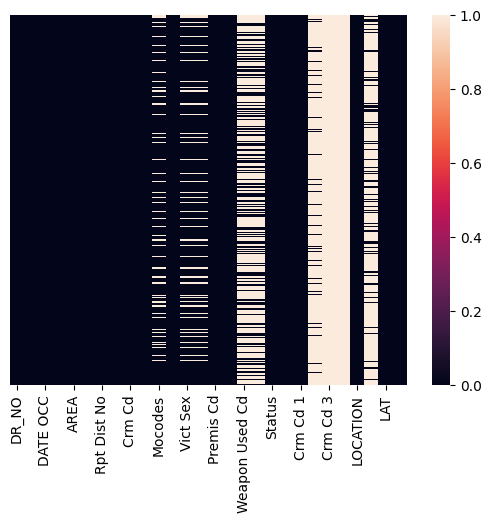

In [ ]:
sns.heatmap(crime.isnull(), yticklabels= False)

In [ ]:
#Missing values
missing_val = [ft for ft in crime.columns if crime[ft].isnull().sum()>1]
print("There are ", len(missing_val) , "columns with missing values")
print()
for ft in missing_val:
    print(ft, ":", np.round(crime[ft].isnull().mean(), 6))

There are  12 columns with missing values

Mocodes : 0.138295
Vict Sex : 0.131545
Vict Descent : 0.131555
Premis Cd : 1.2e-05
Premis Desc : 0.000589
Weapon Used Cd : 0.651379
Weapon Desc : 0.651379
Crm Cd 1 : 1.2e-05
Crm Cd 2 : 0.926379
Crm Cd 3 : 0.997532
Crm Cd 4 : 0.999927
Cross Street : 0.8401


In [ ]:
crime.drop('Cross Street', axis=1)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820594,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,34.2466,-118.4054
820595,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,34.2790,-118.4116
820596,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,33.9841,-118.2915
820597,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,34.0467,-118.2485


In [ ]:
#Dropping rows where all are null values
crime.dropna(how='all', inplace=True)

3.2 Drop Duplicates

In [ ]:
crime.duplicated(subset=['DR_NO']).sum() #check if the unique column has any duplicate entries

0

In [ ]:
crime = crime.drop_duplicates()
crime.shape

(820599, 28)

3.3 Convert Data Types to appropriate forms

In [ ]:
# Convert the date portion
# crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], format='%m/%d/%Y')
# crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y')
import pandas as pd
import re
# Convert the date and time columns to date-time datatype
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#as the time column doesn't have uniform values throughout the dataset, the 0s are added and separated by colon
crime['TIME OCC'] = crime['TIME OCC'].astype(str).str.zfill(4)
crime['TIME OCC'] = crime['TIME OCC'].apply(lambda x: re.sub(r'[^0-9]', ':', x))
crime['TIME OCC'] = crime['TIME OCC'].apply(lambda x: f'{x[:2]}:{x[2:]}')

#converting to time
crime['TIME OCC'] = pd.to_datetime(crime['TIME OCC'], format='%H:%M').dt.time

#crime['TIME OCC'] = crime['TIME OCC'].apply(lambda x: f'{str(x)[:2]}:{str(x)[2:]}' if len(str(x)) > 2 else str(x))

In [ ]:
crime.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                  object
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

**Filling empty values and categorising feature types**

In [ ]:
#Columns that are numerical type
num_col = [ft for ft in crime.columns if  crime[ft].dtypes!= 'object' ]
print("There are", len(num_col), "numerical features")
print("The numerical columns are:", num_col)

There are 16 numerical features
The numerical columns are: ['DR_NO', 'Date Rptd', 'DATE OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']


Temporal features

In [ ]:
#Columns that are temporal type
temporal = [ft for ft in crime.columns if  crime[ft].dtypes== 'datetime64[ns]' or 'TIME' in ft]
print("There are", len(temporal), "temporal features")
print("The temporal columns are:", temporal)

There are 3 numerical features
The temporal columns are: ['Date Rptd', 'DATE OCC', 'TIME OCC']


In [ ]:
#discrete features in numerical types
discrete = [ft for ft in num_col if len(crime[ft].unique()) <25 and ft not in temporal+['DR_NO']]
print("Discrete Variable Count: {}".format(len(discrete)))
print("The discrete columns are:", discrete)

Discrete Variable Count: 3
The discrete columns are: ['AREA', 'Part 1-2', 'Crm Cd 4']


In [ ]:
#categorical features
cat = [ft for ft in crime.columns if crime[ft].dtypes=="O" and ft not in temporal]
print("Discrete Variable Count: {}".format(len(cat)))
print("The categorical columns are:", cat)

Discrete Variable Count: 11
The categorical columns are: ['AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION', 'Cross Street']


**Filling NA values**

In [ ]:
crime['Vict Sex'].fillna('X', inplace=True)
crime['Vict Descent'].fillna('X', inplace=True)
crime['Weapon Desc'].fillna('No Weapon Used', inplace=True)
crime['Weapon Used Cd'].fillna('NA', inplace=True)
crime['Cross Street'].fillna('Info Not Recorded', inplace=True)
crime['Premis Desc'].fillna('Not Known', inplace=True)

In [ ]:
crime['Vict Sex'] = crime['Vict Sex'].replace('-', 'X')
crime['Vict Sex'] = crime['Vict Sex'].replace('H', 'X')


3.4 Deal with Outliers

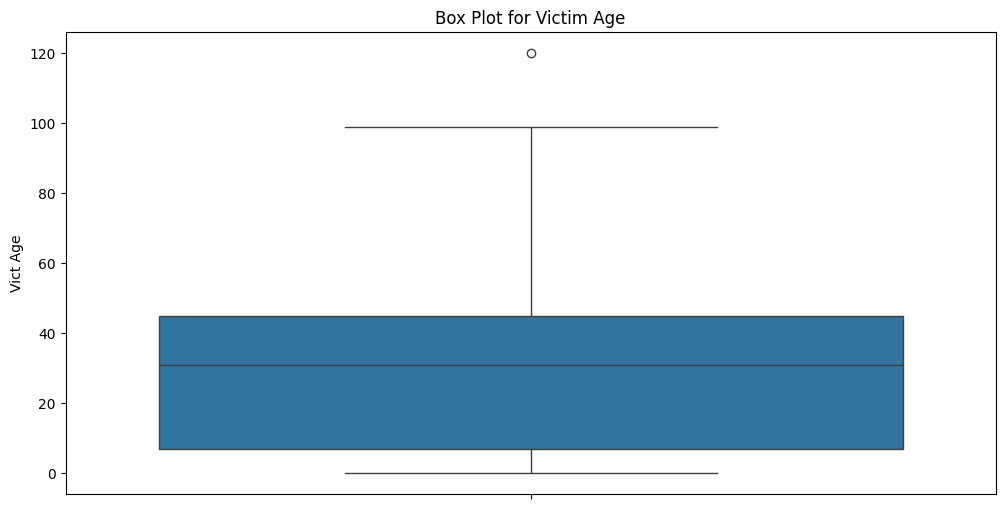

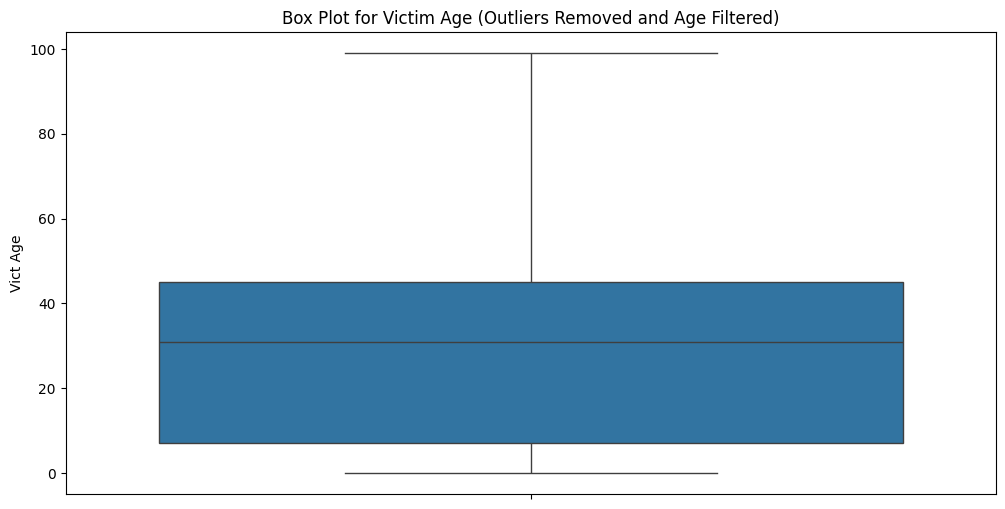

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the column with outliers
selected_column = 'Vict Age'

# Create box plots using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime[selected_column])
plt.title('Box Plot for Victim Age')
plt.show()

# Filter the 'Vict Age' column to include values within the range of 1 to 100
f1 = crime[(crime[selected_column] >= 0)]
filtered_data = f1[(f1[selected_column] < 100)]

# Create a new box plot after removing outliers and filtering the age range
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data[selected_column])
plt.title('Box Plot for Victim Age (Outliers Removed and Age Filtered)')
plt.show()


In [ ]:
crime['Vict Age'].describe()

count    820599.000000
mean         29.806031
std          21.776511
min          -3.000000
25%           7.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64

In [ ]:
crime[crime['Vict Age']<0].shape[0]

70

In [ ]:
crime[crime['Vict Age']>100].shape[0]

1

In [ ]:
crime[crime['Vict Age']>=0]['Vict Age'].mean()

29.808677085148727

In [ ]:
age_val = [30, 35, 40, 45]
rand_ind = np.random.choice(len(age_val), size=crime[crime['Vict Age']<0].shape[0])
crime.loc[crime['Vict Age']<0, 'Vict Age'] = np.array(age_val)[rand_ind]

In [ ]:
#Deal with outliers
selected_columns = ['Vict Age', 'Crm Cd', 'Premis Cd','AREA']

# Calculate the IQR for each selected column
iqr_values = {}
for column in selected_columns:
    q1 = crime[column].quantile(0.25)
    q3 = crime[column].quantile(0.75)
    iqr = q3 - q1
    iqr_values[column] = iqr

print("Interquartile Ranges (IQR) for Selected Columns:")
for column, iqr in iqr_values.items():
    print(f"{column}: {iqr:.2f}")

Interquartile Ranges (IQR) for Selected Columns:
Vict Age: 38.00
Crm Cd: 295.00
Premis Cd: 400.00
AREA: 10.00


3.5 Standardisation and Normalisation

In [ ]:
# Calculate the monthly crime count for each year
crime['Year'] = crime['DATE OCC'].dt.year
crime['Month'] = crime['DATE OCC'].dt.month
crime_counts = crime.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Calculate the number of unique months present in each year
months_per_year = crime.groupby('Year')['Month'].nunique()

# Normalize the annual crime count by dividing it by the number of unique months
annual_crm_cnt = crime_counts.sum(axis=1)
std_rate = annual_crm_cnt / months_per_year

In [ ]:
crime_counts

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,18485,17252,16161,15678,17200,17028,17114,16870,15631,16485,15565,15940
2021,16536,15405,16315,16054,16988,17146,18655,18368,18351,19290,18327,17918
2022,18434,17690,19682,19779,20402,20189,19933,20067,19264,20238,18660,19889
2023,19573,18271,18977,18703,18673,18408,19575,19472,18020,7938,0,0


In [ ]:
# crime['AREA NAME'].value_counts()

3.6 Encode Categorical Data

In [ ]:
import pandas as pd
# Count the number of non-empty 'Crm Cd' columns for each row
crime['Number_Filled'] = crime[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']].count(axis=1)

# Map the count to the appropriate category
crime['Combined_Crime_Codes'] = crime['Number_Filled'].apply(lambda count: f'{count}')

# Drop the 'Number_Filled' column if not needed
crime.drop('Number_Filled', axis=1, inplace=True)

# Display the DataFrame with the new 'Combined_Crime_Codes' column
print(crime[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Combined_Crime_Codes']])


        Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4 Combined_Crime_Codes
0          624.0       NaN       NaN       NaN                    1
1          624.0       NaN       NaN       NaN                    1
2          845.0       NaN       NaN       NaN                    1
3          745.0     998.0       NaN       NaN                    2
4          740.0       NaN       NaN       NaN                    1
...          ...       ...       ...       ...                  ...
820594     740.0       NaN       NaN       NaN                    1
820595     230.0       NaN       NaN       NaN                    1
820596     230.0       NaN       NaN       NaN                    1
820597     352.0       NaN       NaN       NaN                    1
820598     745.0       NaN       NaN       NaN                    1

[820599 rows x 5 columns]


In [ ]:
#count the severity of crime based on the number of codes in mocodes
crime['Mocodes']

0                   0444 0913
1              0416 1822 1414
2                        1501
3                   0329 1402
4                        0329
                 ...         
820594              1300 0329
820595         0416 0411 1822
820596    0601 0445 0416 0359
820597              1822 0344
820598              0329 1822
Name: Mocodes, Length: 820599, dtype: object

In [ ]:
crime['Mocodes'] = crime['Mocodes'].astype(str)

In [ ]:
crime['Mo_count'] = crime['Mocodes'].apply(lambda x: len(str(x).split()))
crime['Mo_count'].head()

0    2
1    3
2    1
3    2
4    1
Name: Mo_count, dtype: int64

Crime Frequency by Crime status

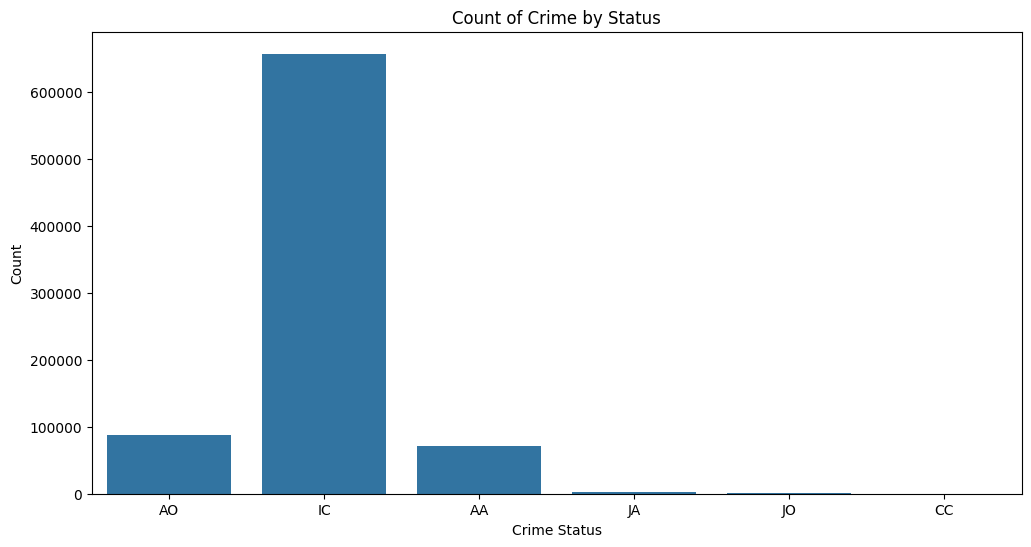

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='Status')
plt.title('Count of Crime by Status')
plt.xlabel('Crime Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Create a new column 'Weapon_Category' based on 'Weapon Desc'
crime['Weapon'] = (crime['Weapon Desc'] != 'No Weapon Used').astype(int)

# Display the updated DataFrame
print(crime[['Weapon Desc', 'Weapon']])

                                           Weapon Desc  Weapon
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
1                          UNKNOWN WEAPON/OTHER WEAPON       1
2                                       No Weapon Used       0
3                                       No Weapon Used       0
4                                       No Weapon Used       0
...                                                ...     ...
820594                                  No Weapon Used       0
820595  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
820596                     UNKNOWN WEAPON/OTHER WEAPON       1
820597                                  No Weapon Used       0
820598                                  No Weapon Used       0

[820599 rows x 2 columns]


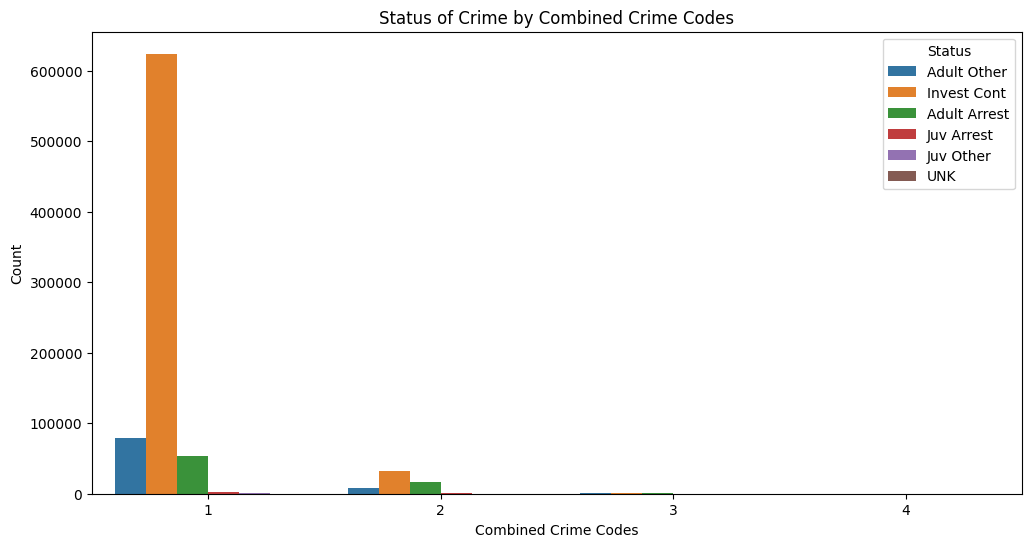

In [ ]:
# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='Combined_Crime_Codes', hue='Status Desc')
plt.title('Status of Crime by Combined Crime Codes')
plt.xlabel('Combined Crime Codes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status', loc='upper right')
plt.show()

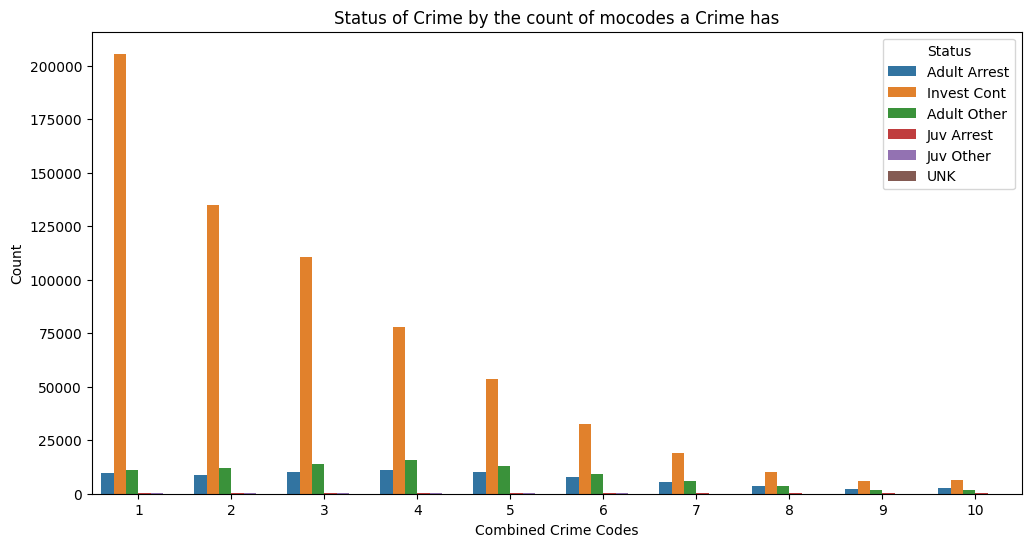

In [ ]:
# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='Mo_count', hue='Status Desc')
plt.title('Status of Crime by the count of mocodes a Crime has')
plt.xlabel('Combined Crime Codes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status', loc='upper right')
plt.show()

**EXPLORATORY DATA ANALYSIS**

4.1 Visualising Crime Trends from 2020 to current year

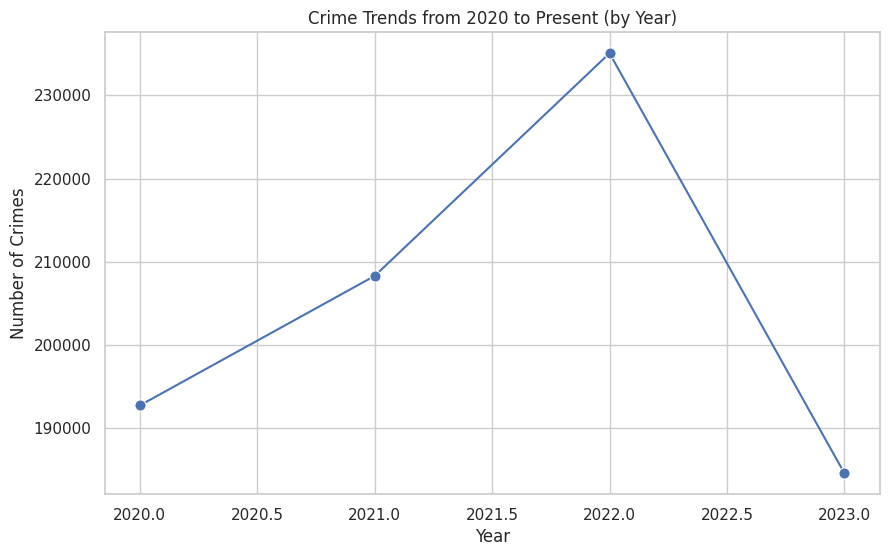

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the range from 2020 to the current year
start_year = 2020
current_year = crime['Date Rptd'].max().year
crime_range = crime[(crime['Date Rptd'].dt.year >= start_year) & (crime['Date Rptd'].dt.year <= current_year)]

# Group data by year and count the number of crimes per year
crime_by_year = crime_range['Date Rptd'].dt.year.value_counts().sort_index()

# Create a line plot to visualize the crime trends
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=crime_by_year, marker="o", markersize=8, color="b")
plt.title("Crime Trends from 2020 to Present (by Year)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.show()


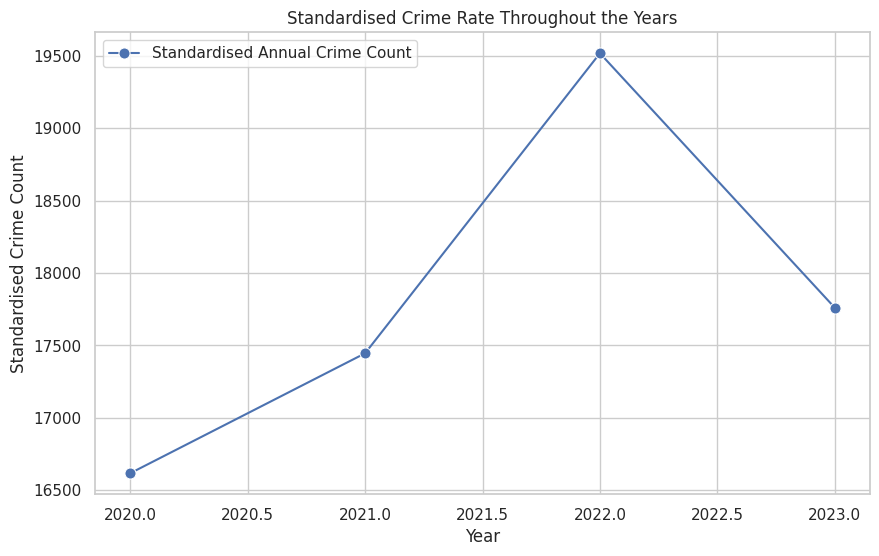

In [ ]:
# Create a line plot to visualize the normalized crime count
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#plt.plot(std_rate.index, std_rate.values, marker='o', linestyle='-')
sns.lineplot(data=std_rate, marker="o", markersize=8, color="b", label="Standardised Annual Crime Count")
plt.xlabel('Year')
plt.ylabel('Standardised Crime Count')
plt.title('Standardised Crime Rate Throughout the Years')
#plt.grid()
plt.show()


4.2 Seasonal Pattern of Crime Data

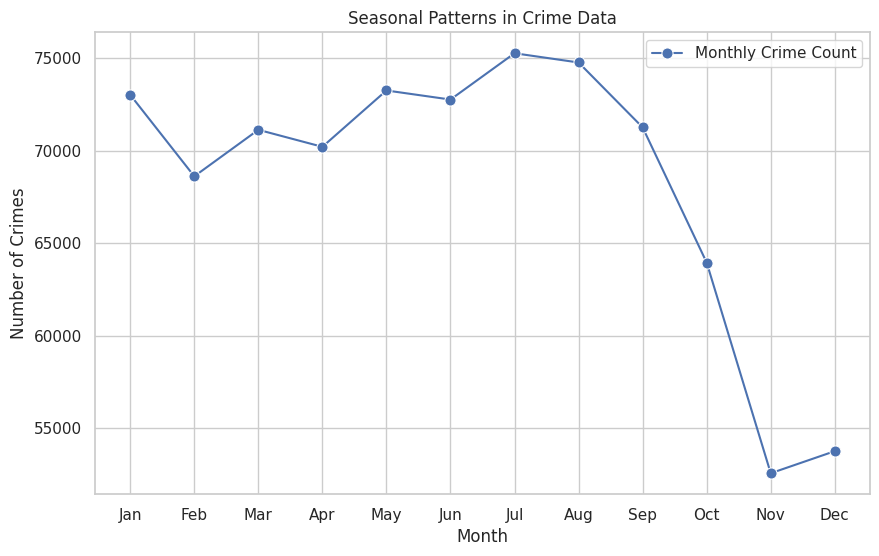

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'DATE OCC' to datetime format and extract the month
#crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y')
crime['Month'] = crime['DATE OCC'].dt.month
crime['Year'] = crime['DATE OCC'].dt.year

# Group data by month and count the occurrences
crime_by_month = crime.groupby('Month').size()

# Create a line plot to visualize the seasonal patterns
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=crime_by_month, marker="o", markersize=8, color="b", label="Monthly Crime Count")

plt.title("Seasonal Patterns in Crime Data")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=0)
plt.show()


Average number of crimes **Normalised**

In [ ]:
crime_by_month = crime.groupby('Month').size()
tot_days = crime.groupby(['Month', 'Year'])['DATE OCC'].max().dt.day.groupby('Month').sum()

std_monthly = crime_by_month /tot_days

In [ ]:
std_monthly

Month
1     588.935484
2     607.238938
3     573.669355
4     585.116667
5     590.830645
6     606.425000
7     607.072581
8     603.040323
9     593.883333
10    586.706422
11    583.911111
12    577.924731
dtype: float64

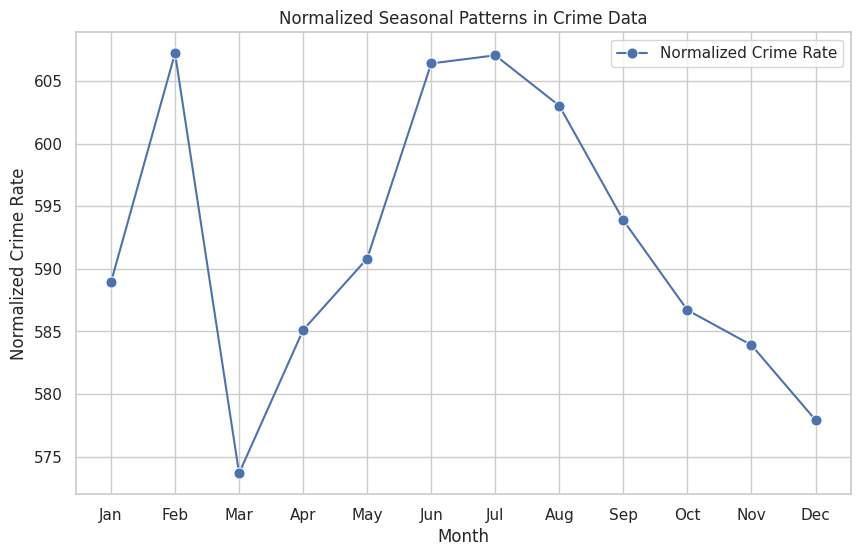

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=std_monthly, marker="o", markersize=8, color="b", label="Normalized Crime Rate")

plt.title("Normalized Seasonal Patterns in Crime Data")
plt.xlabel("Month")
plt.ylabel("Normalized Crime Rate")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks
plt.show()

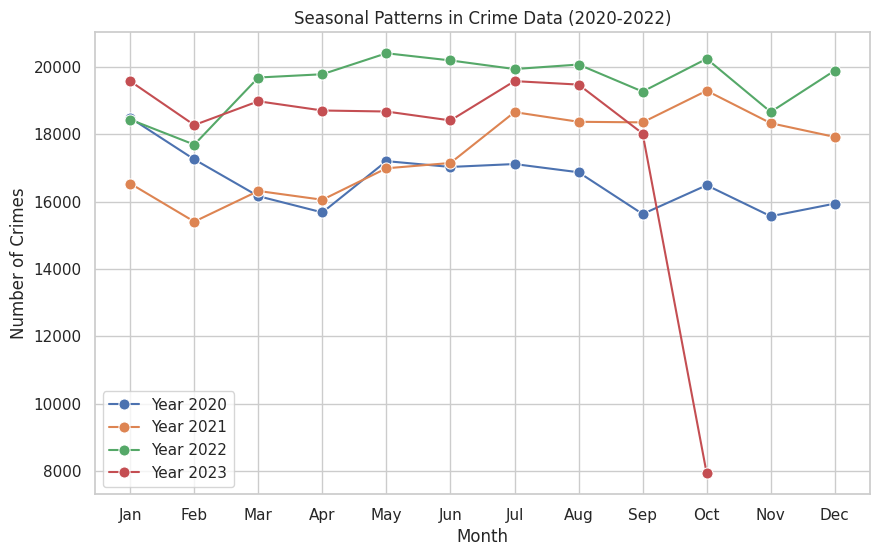

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by year and month and count the occurrences
crime_by_year_month = crime.groupby(['Year', 'Month']).size().unstack()

# Create a line plot to visualize the seasonal patterns for different years
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot different lines for each year
for year in crime_by_year_month.index:
    sns.lineplot(data=crime_by_year_month.loc[year], marker="o", markersize=8, label=f"Year {year}")

plt.title("Seasonal Patterns in Crime Data (2020-2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()


In [ ]:
crime.sort_values(by='DATE OCC', ascending=False, inplace=True)

4.3 Most Common Type of Crime

In [ ]:
crimegrp=  crime.groupby('Crm Cd Desc')
crime.groupby('Crm Cd Desc').size()

Crm Cd Desc
ARSON                                                        2260
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                 1002
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47235
ATTEMPTED ROBBERY                                            4279
BATTERY - SIMPLE ASSAULT                                    65360
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1652
VIOLATION OF COURT ORDER                                     5682
VIOLATION OF RESTRAINING ORDER                              10432
VIOLATION OF TEMPORARY RESTRAINING ORDER                      812
WEAPONS POSSESSION/BOMBING                                     32
Length: 138, dtype: int64

In [ ]:
num_groups = crimegrp.ngroups
print("The no. of crime types committed in LA are: ", num_groups)

The no. of crime types committed in LA are:  138


In [ ]:
# Use the 'Crm Cd Desc' column to count the occurrences of each crime description
crimetype = crime['Crm Cd Desc'].value_counts()
comm_crime= crimetype.index[0]
freq = crimetype.iloc[0]

print("The most common crime type is:", comm_crime, "with a frequency of", freq)


The most common crime type is: VEHICLE - STOLEN with a frequency of 87888


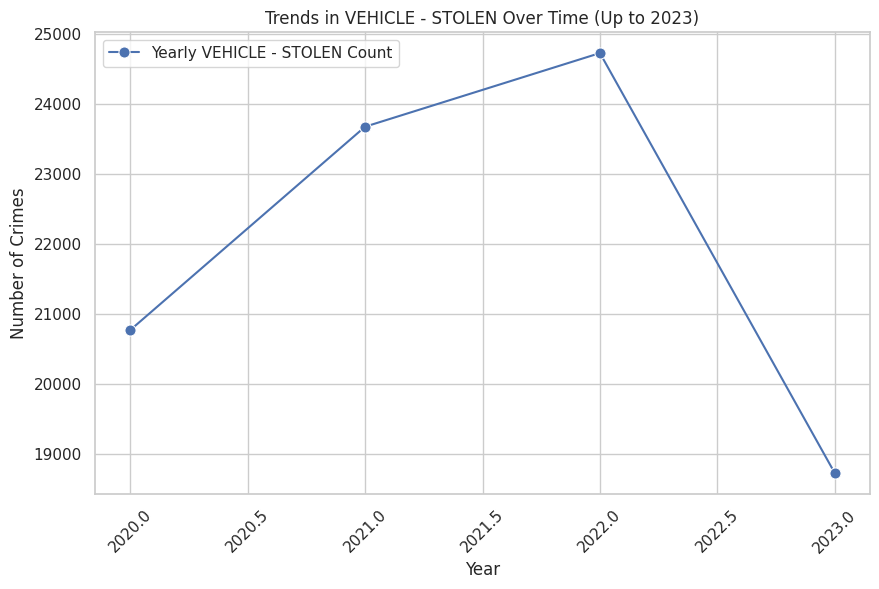

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the most common crime type
mostcomm_crime = crime[crime['Crm Cd Desc'] == comm_crime]

# Find the maximum date in the dataset
latest_date = mostcomm_crime['DATE OCC'].max()

# Filter the data for dates up to the latest date
mostcomm_crime = mostcomm_crime[mostcomm_crime['DATE OCC'] <= latest_date]

# Group the data by year and count the number of occurrences
crime_by_year = mostcomm_crime.groupby('Year').size()

#Line plot to visualize the trends over time
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=crime_by_year, marker="o", markersize=8, color="b", label=f"Yearly {comm_crime} Count")
plt.title(f"Trends in {comm_crime} Over Time (Up to {latest_date.year})")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


4.4 Crime rates in different regions

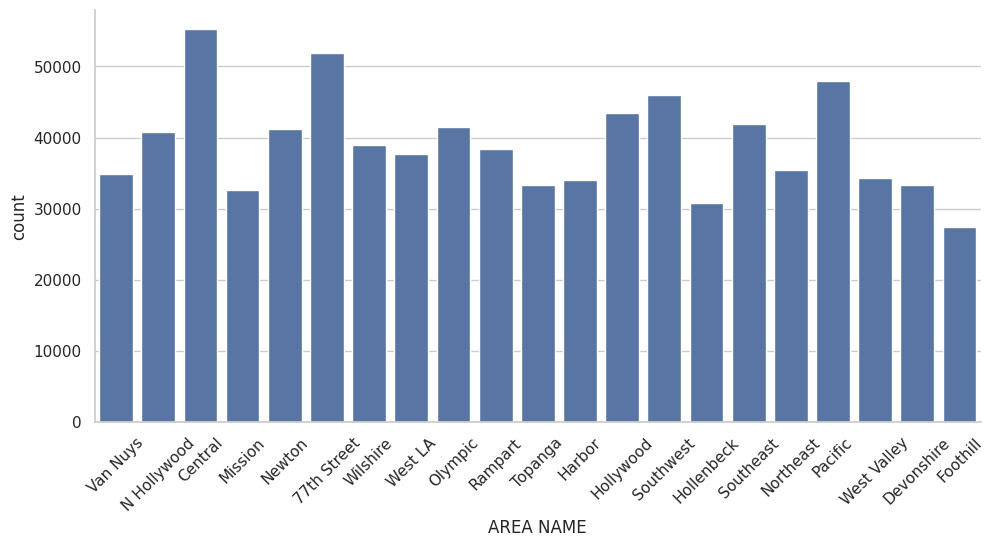

In [ ]:
sns.catplot(x = "AREA NAME",
            data = crime,
            aspect = 2.0,
            kind = "count").set_xticklabels(rotation=45)


In [ ]:
crime.groupby("AREA NAME").size()

AREA NAME
77th Street    51853
Central        55209
Devonshire     33266
Foothill       27354
Harbor         33967
Hollenbeck     30803
Hollywood      43474
Mission        32660
N Hollywood    40768
Newton         41139
Northeast      35409
Olympic        41435
Pacific        48003
Rampart        38383
Southeast      41854
Southwest      45957
Topanga        33338
Van Nuys       34815
West LA        37639
West Valley    34311
Wilshire       38962
dtype: int64

In [ ]:
import plotly.express as px
def crime_area(df):
  num_crime = pd.DataFrame(df.groupby("AREA NAME").size().reset_index(name= "count")).sort_values(by ='count',ascending=False).head(10)
  fig = px.pie(num_crime, names = "AREA NAME", values= "count", title = "Number of Crimes by Area")
  fig.show()

crime_area(crime)


4.5 **ECONOMIC FACTORS:**

In [ ]:
gdpdata = pd.read_csv('/content/drive/MyDrive/content/gdp_usa.csv', delimiter=",")

In [ ]:
gdpdata

,Year,GDP (in trillions)
0,2020,21.06
1,2021,23.32
2,2022,25.44


In [ ]:
gdpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3 non-null      int64  
 1   GDP (in trillions)  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [ ]:
#gdpdata['Year'] = pd.to_datetime(gdpdata['Year'])

In [ ]:
# from datetime import datetime
# gdpdata['DATE'] = pd.to_datetime(gdpdata['DATE'])

# # Filter the DataFrame for dates starting from 2020-01-01
# gdpdata = gdpdata[gdpdata['DATE'] >= datetime(2020, 1, 1)]
# gdpdata

In [ ]:
# Filter data for the years 2020-2022
crime_data = crime[(crime['Year'] == 2020) | (crime['Year'] == 2021) | (crime['Year']==2022)]

# Group and count the crimes year-wise
crime_counts = crime_data['Year'].value_counts().reset_index()
crime_counts.columns = ['Year', 'Crime_Count']#crime_counts['Year'] = pd.to_datetime(crime_counts['Year'])
merged_data = pd.merge(crime_counts, gdpdata, on='Year')
merged_data

,Year,Crime_Count,GDP (in trillions)
0,2022,234227,25.44
1,2021,209353,23.32
2,2020,199409,21.06


In [ ]:
merged_data

,Year,Crime_Count,GDP (in trillions)
0,2022,234227,25.44
1,2021,209353,23.32
2,2020,199409,21.06


In [ ]:
#normalise the gdp and crime count
# merged_data['Crime_Count'] = merged_data['Crime_Count']
from sklearn.preprocessing import MinMaxScaler

# Select columns to be normalized
columns_to_normalize = ['Crime_Count', 'GDP (in trillions)']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize selected columns
merged_data[columns_to_normalize] = scaler.fit_transform(merged_data[columns_to_normalize])

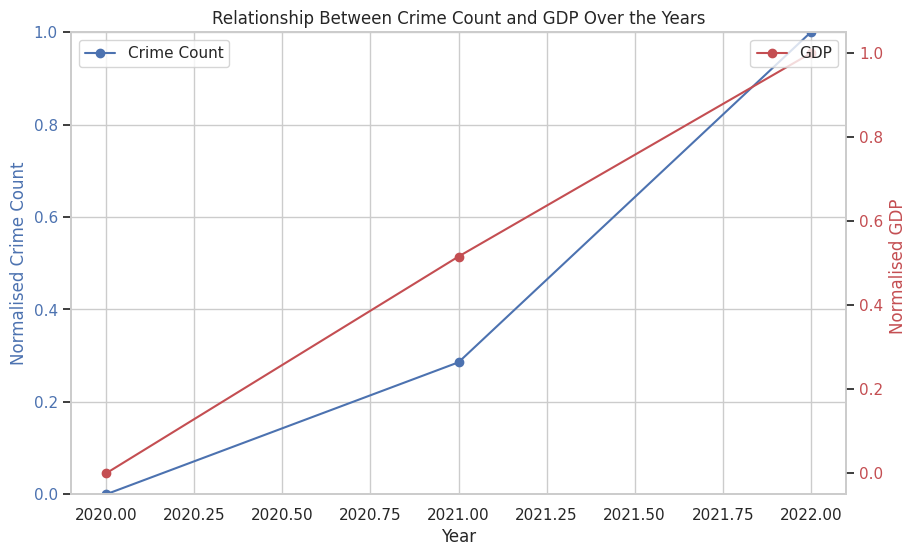

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Crime_Count' on the primary y-axis
ax1.plot(merged_data['Year'], merged_data['Crime_Count'], marker='o', linestyle='-', color='b', label='Crime Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Normalised Crime Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set the limits for the primary y-axis to make the 'Crime Count' visible
ax1.set_ylim(0, max(merged_data['Crime_Count']))

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot 'GDP' on the secondary y-axis
ax2.plot(merged_data['Year'], merged_data['GDP (in trillions)'], marker='o', linestyle='-', color='r', label='GDP')
ax2.set_ylabel('Normalised GDP ', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# Add titles and legends
plt.title('Relationship Between Crime Count and GDP Over the Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()


In [ ]:
merged_data

,Year,Crime_Count,GDP (in trillions)
0,2022,1.000000,1.000000
1,2021,0.285599,0.515982
2,2020,0.000000,0.000000


Crime Count (Blue Line):

The blue line representing 'Crime Count' has a fluctuating trend.
It shows periodic peaks and valleys, indicating that the number of reported crimes varies over time.
The trend suggests potential periods of increased and decreased crime activity, which may follow a cyclic or seasonal pattern.
GDP (Red Line):

The red line representing 'GDP' (Gross Domestic Product) also exhibits a fluctuating trend.
Similar to the 'Crime Count' line, it has periodic peaks and valleys.
The trend in the GDP line suggests that the economic output, as represented by GDP, experiences variations over the years, possibly following economic cycles.

In [ ]:
unemp = pd.read_csv('/content/drive/MyDrive/content/unemployment.csv', delimiter=",")
unemp.head()

,DATE,CALOSA7URN
0,2020-01-01,4.9
1,2020-02-01,4.9
2,2020-03-01,6.7
3,2020-04-01,17.0
4,2020-05-01,19.0


In [ ]:
unemp.rename(columns={'CALOSA7URN': 'UnempRate'}, inplace=True)
unemp['DATE']= pd.to_datetime(unemp['DATE'])
result = unemp.groupby(unemp['DATE'].dt.year)['UnempRate'].mean().reset_index()

# Rename the columns for clarity
result.columns = ['Year', 'Mean_Rate']

# Display the result
print(result)


   Year  Mean_Rate
0  2020  12.400000
1  2021   8.925000
2  2022   4.916667
3  2023   5.188889


In [ ]:
crime_info = crime[(crime['Year'] == 2020) | (crime['Year'] == 2021) | (crime['Year'] == 2022) | (crime['Year'] == 2023)]
crime_rate = crime_info['Year'].value_counts().reset_index()
crime_rate.columns = ['Year', 'Crime_Count']
emp_crime = pd.merge(crime_rate, result, on='Year')
emp_crime.set_index('Year', inplace=True)
emp_crime.sort_index(inplace=True)
emp_crime

,Crime_Count,Mean_Rate
Year,,
2020,199409,12.400000
2021,209353,8.925000
2022,234227,4.916667
2023,177610,5.188889


In [ ]:
from scipy import stats
min_range = 0
max_range = 1

# Calculate the min and max values for the 'Mean_Rate' column
min_value = emp_crime['Mean_Rate'].min()
max_value = emp_crime['Mean_Rate'].max()

min_cr = emp_crime['Crime_Count'].min()
max_cr = emp_crime['Crime_Count'].max()

# Apply Min-Max normalization to 'Mean_Rate'
emp_crime['Mean_Rate'] = (emp_crime['Mean_Rate'] - min_value) / (max_value - min_value) * (max_range - min_range) + min_range
emp_crime['Crime_Count'] = (emp_crime['Crime_Count'] - min_cr) / (max_cr - min_cr) * (max_range - min_range) + min_range


# Display the DataFrame with the normalized column
print(emp_crime)

      Crime_Count  Mean_Rate
Year                        
2020     0.385026   1.000000
2021     0.560662   0.535635
2022     1.000000   0.000000
2023     0.000000   0.036377


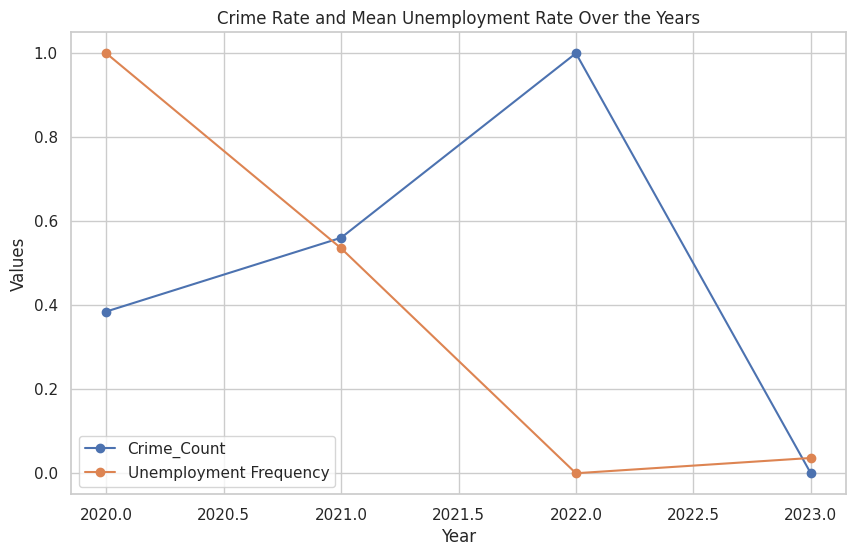

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot 'Crime_Count' as a line
plt.plot(emp_crime.index, emp_crime['Crime_Count'], marker='o', label='Crime_Count')

# Plot 'Mean_Rate' as a line
plt.plot(emp_crime.index, emp_crime['Mean_Rate'], marker='o', label='Unemployment Frequency')

plt.title("Crime Rate and Mean Unemployment Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

plt.show()


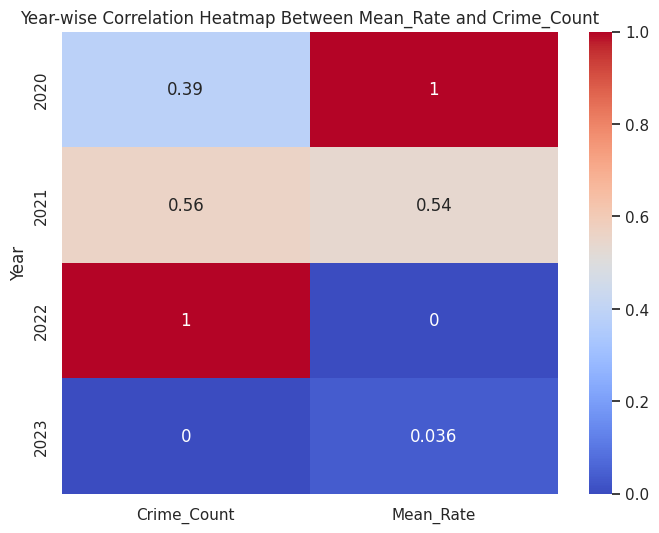

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a year-wise correlation matrix
correlation = emp_crime['Crime_Count'].corr(emp_crime['Mean_Rate'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(emp_crime[['Crime_Count', 'Mean_Rate']],annot=True, cmap='coolwarm', cbar=True)
plt.title("Year-wise Correlation Heatmap Between Mean_Rate and Crime_Count")
plt.show()


In [ ]:
poverty = pd.read_csv('/content/drive/MyDrive/content/poverty.csv', delimiter=",")
poverty.head()

,ID Race,Race,ID Year,Year,ID Poverty Status,Poverty Status,Poverty Population,Poverty Population Moe,Geography,ID Geography,Slug Geography,share,Sex,ID Sex
0,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,244039,4031.489179,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.102220,Male,0
1,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,292782,4341.558821,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.122636,Female,1
2,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,70741,2245.161464,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.029631,Male,0
3,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,83380,2499.522554,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.034925,Female,1
4,3,Native American,2021,2021,0,Income In The Past 12 Months Below Poverty Level,7368,684.054091,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.003086,Male,0


In [ ]:
columns_to_drop = ['tract', 'Geography', 'ID Geography']

In [ ]:
poverty = poverty[(poverty['Year']==2020) | (poverty['Year'] == 2021)]
poverty.head()

,ID Race,Race,ID Year,Year,ID Poverty Status,Poverty Status,Poverty Population,Poverty Population Moe,Geography,ID Geography,Slug Geography,share,Sex,ID Sex
0,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,244039,4031.489179,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.102220,Male,0
1,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,292782,4341.558821,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.122636,Female,1
2,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,70741,2245.161464,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.029631,Male,0
3,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,83380,2499.522554,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.034925,Female,1
4,3,Native American,2021,2021,0,Income In The Past 12 Months Below Poverty Level,7368,684.054091,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.003086,Male,0


In [ ]:
poverty = poverty.groupby('Year')['Poverty Population'].sum().reset_index()
poverty

,Year,Poverty Population
0,2020,2453311
1,2021,2387401


In [ ]:
combined_data = pd.merge(crime_counts, poverty, on='Year')
combined_data

,Year,Crime_Count,Poverty Population
0,2021,209353,2387401
1,2020,199409,2453311


In [ ]:
weapongrp= crime.groupby('Weapon Desc')
n = weapongrp.ngroups
n

80

4.6 Frequency of crime by days of the weeks

In [ ]:
crime['dow'] = crime['DATE OCC'].dt.day_name()


<ipython-input-116-753acc3544b5>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



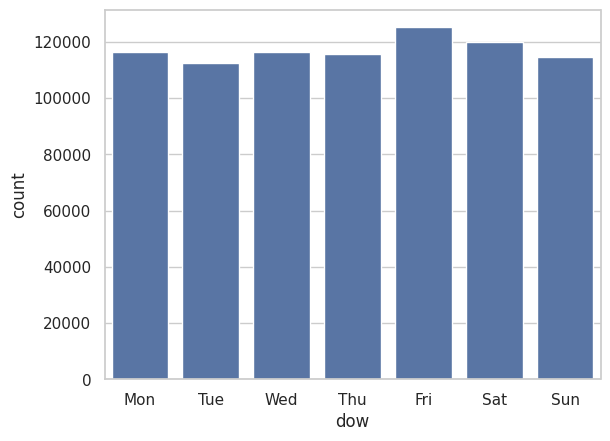

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.countplot(x = "dow", data = crime, order=day_order)
ax.set_xticklabels(ax.get_xticklabels())
custom_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(0, 7), custom_labels)

plt.show()

4.7 Major policy changes on crime rates

In [ ]:
covid_data = pd.read_csv('/content/drive/MyDrive/content/covid_data.csv', delimiter=",")

In [ ]:
# Convert the date column to a datetime data type
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Convert the date column to a datetime data type
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Extract the year from the date
covid_data['Year'] = covid_data['date'].dt.year

# Find the last date of each year
last_date_of_year = covid_data[covid_data.groupby('Year')['date'].transform('max') == covid_data['date']]

# Drop duplicate years to keep only the latest date for each year
last_date_of_year = last_date_of_year.drop_duplicates('Year')

# Select relevant columns (Year, date, cases)
covid_data = last_date_of_year[['Year', 'date', 'cases']]

# Display the last date and COVID-19 cases for each year
print(covid_data)

      Year       date    cases
203   2021 2021-12-31  1780154
658   2020 2020-12-31   829549
1119  2022 2022-12-31  3638639
2696  2023 2023-03-06  3710586


In [ ]:
crime_counts = crime['Year'].value_counts().reset_index()
crime_counts.columns = ['Year', 'Crime_Count']
policy =pd.merge(covid_data, crime_counts, on='Year')
policy = policy.sort_values(by='Year', ascending=True)
policy


,Year,date,cases,Crime_Count
1,2020,2020-12-31,829549,199409
0,2021,2021-12-31,1780154,209353
2,2022,2022-12-31,3638639,234227
3,2023,2023-03-06,3710586,177610


In [ ]:
#Normalise the data
columns_to_normalize = ['cases', 'Crime_Count']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize selected columns
policy[columns_to_normalize] = scaler.fit_transform(policy[columns_to_normalize])

In [ ]:
df = pd.DataFrame(policy)

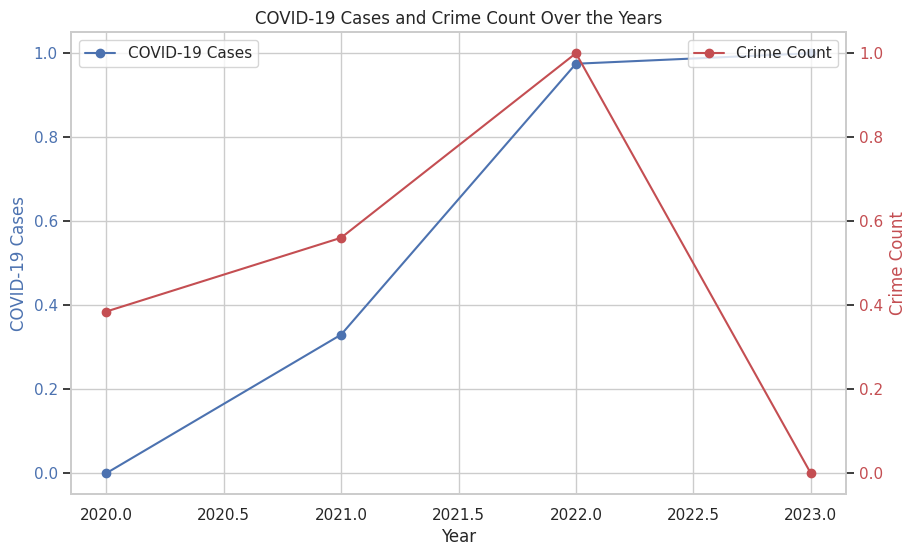

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset (COVID-19 Cases) on the primary y-axis
ax1.plot(df['Year'], df['cases'], label='COVID-19 Cases', marker='o', linestyle='-', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('COVID-19 Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Crime_Count'], label='Crime Count', marker='o', linestyle='-', color='r')
ax2.set_ylabel('Crime Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and legends
plt.title('COVID-19 Cases and Crime Count Over the Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()

4.8 Demographic Factors

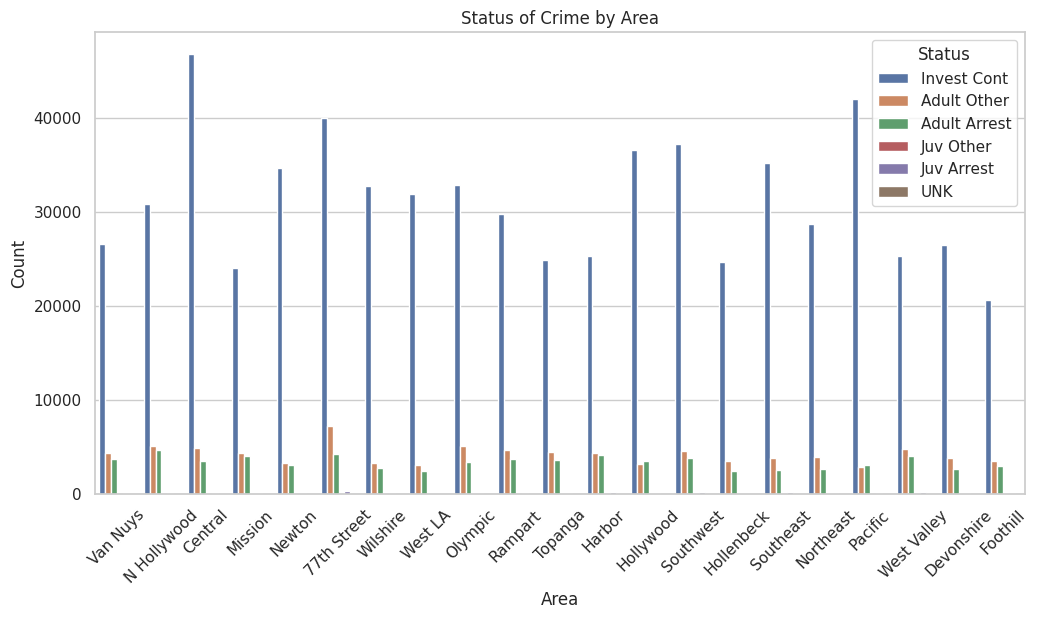

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a 'Status' column and an 'AREA' column in your DataFrame

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='AREA NAME', hue='Status Desc')
plt.title('Status of Crime by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper right')
plt.show()


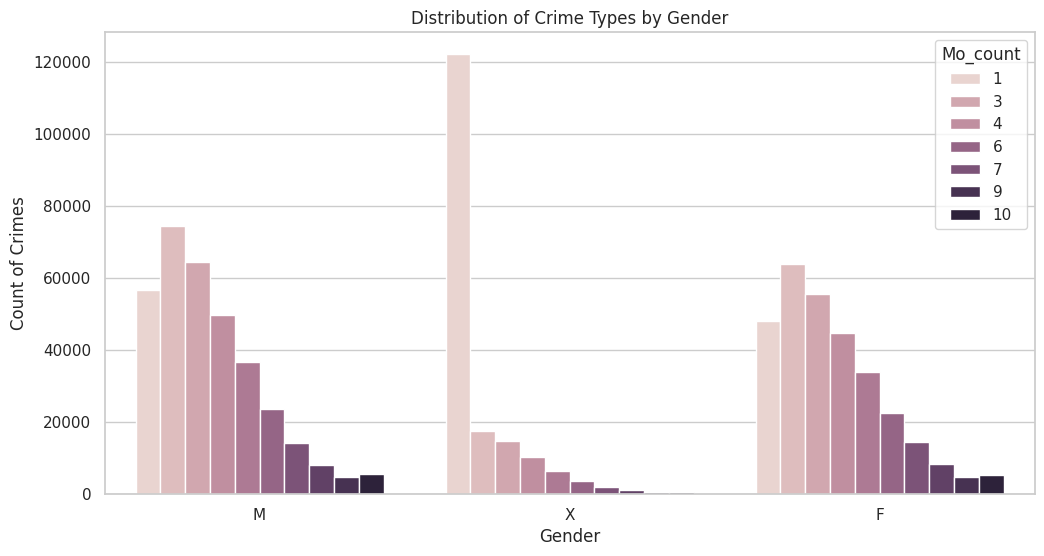

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='Vict Sex', hue= 'Mo_count')
plt.title('Distribution of Crime Types by Gender')
#custom_labels = ['Female', 'Male', 'Unknown', 'H']
plt.xlabel('Gender')
plt.ylabel('Count of Crimes')
#plt.xticks(range(0, 4), custom_labels)

plt.show()

4.9 Patterns between Demographic Factors and Specific Type of Crimes

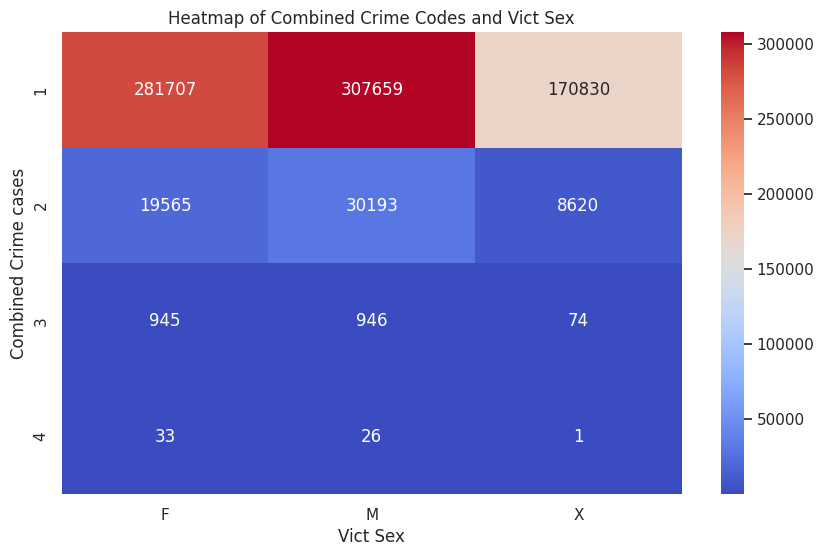

In [ ]:

# Create a pivot table
pivot_table = crime.pivot_table(index='Combined_Crime_Codes', columns='Vict Sex', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Combined Crime Codes and Vict Sex')
plt.xlabel('Vict Sex')
plt.ylabel('Combined Crime cases')
plt.show()


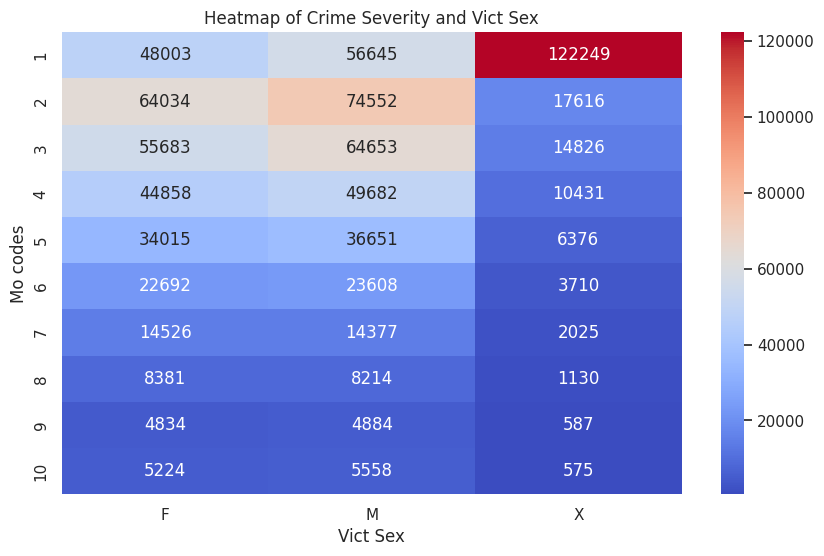

In [ ]:

# Create a pivot table
pivot_table = crime.pivot_table(index='Mo_count', columns='Vict Sex', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Crime Severity and Vict Sex')
plt.xlabel('Vict Sex')
plt.ylabel('Mo codes')
plt.show()


In [ ]:
crime['Weapon'] = (crime['Weapon Desc'] != 'No Weapon Used').astype(int)
print(crime[['Weapon Desc', 'Weapon']])


                                           Weapon Desc  Weapon
810660                                  No Weapon Used       0
764193                                  No Weapon Used       0
743496                                  No Weapon Used       0
750933  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
791524                                  No Weapon Used       0
...                                                ...     ...
148544  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
101355  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
60007                                   No Weapon Used       0
13367                                   No Weapon Used       0
21417   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1

[820599 rows x 2 columns]


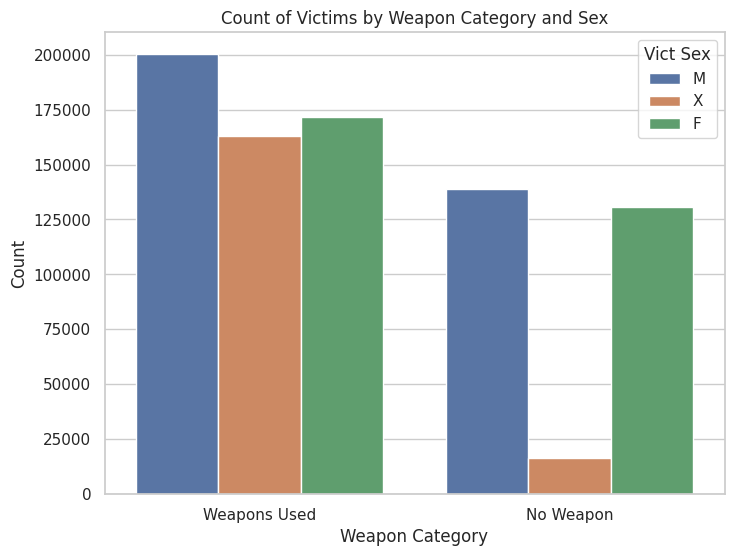

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=crime, x='Weapon', hue='Vict Sex')
plt.title('Count of Victims by Weapon Category and Sex')
plt.xlabel('Weapon Category')
plt.ylabel('Count')
plt.xticks([1, 0], ['No Weapon', 'Weapons Used'])
plt.legend(title='Vict Sex')
plt.show()

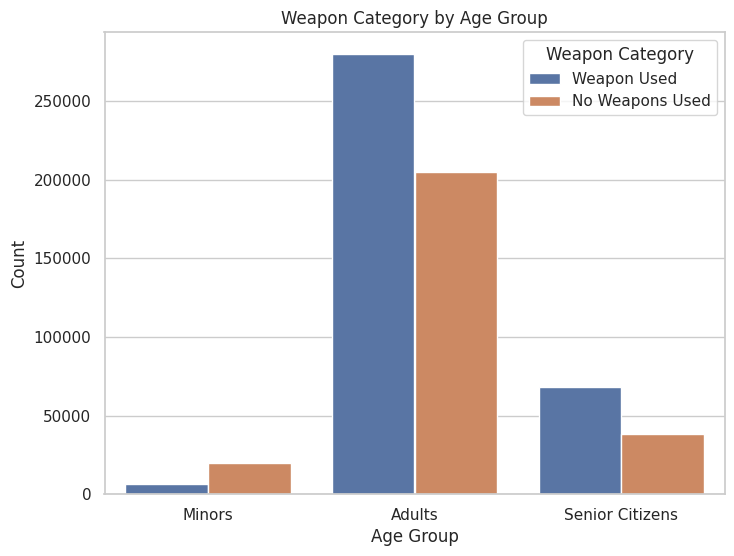

In [ ]:
# Create a new column 'Age_Group' based on age categorization
crime['Age_Group'] = pd.cut(crime['Vict Age'], bins=[0, 18, 55, float('inf')], labels=['Minors', 'Adults', 'Senior Citizens'])

# Create a countplot to visualize the relationship between 'Age_Group' and 'Weapon_Category'
plt.figure(figsize=(8, 6))
sns.countplot(data=crime, x='Age_Group', hue='Weapon')
plt.title('Weapon Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Weapon Category', labels=['Weapon Used', 'No Weapons Used'])
plt.show()


<ipython-input-129-fa1044d122ed>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



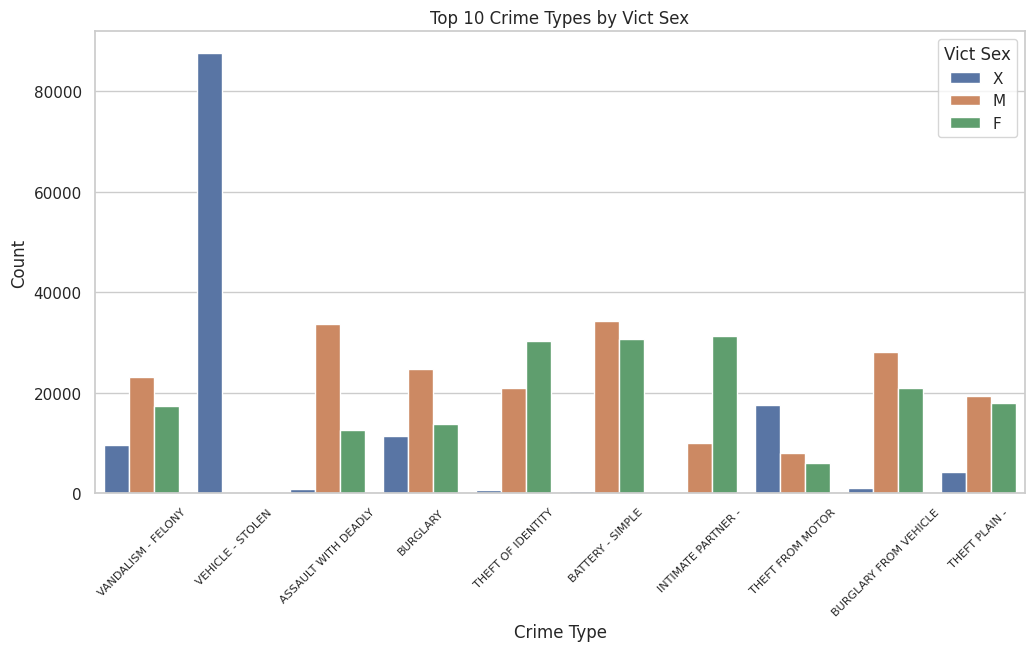

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each crime type and select the top 10
top_10_crime_types = crime['Crm Cd Desc'].value_counts().nlargest(10).index

# Filter the data for the top 10 crime types
top_10_crime_data = crime[crime['Crm Cd Desc'].isin(top_10_crime_types)]
top_10_crime_data['Crm Cd Desc Short'] = top_10_crime_data['Crm Cd Desc'].str.split().str[:3].str.join(' ')

# Create a countplot to visualize the relationship between 'Crm Cd Desc' and 'Vict Sex'
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_crime_data, x='Crm Cd Desc Short', hue='Vict Sex')
plt.title('Top 10 Crime Types by Vict Sex')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.legend(title='Vict Sex', loc='upper right')
plt.show()


<ipython-input-94-465f25c6d8cf>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



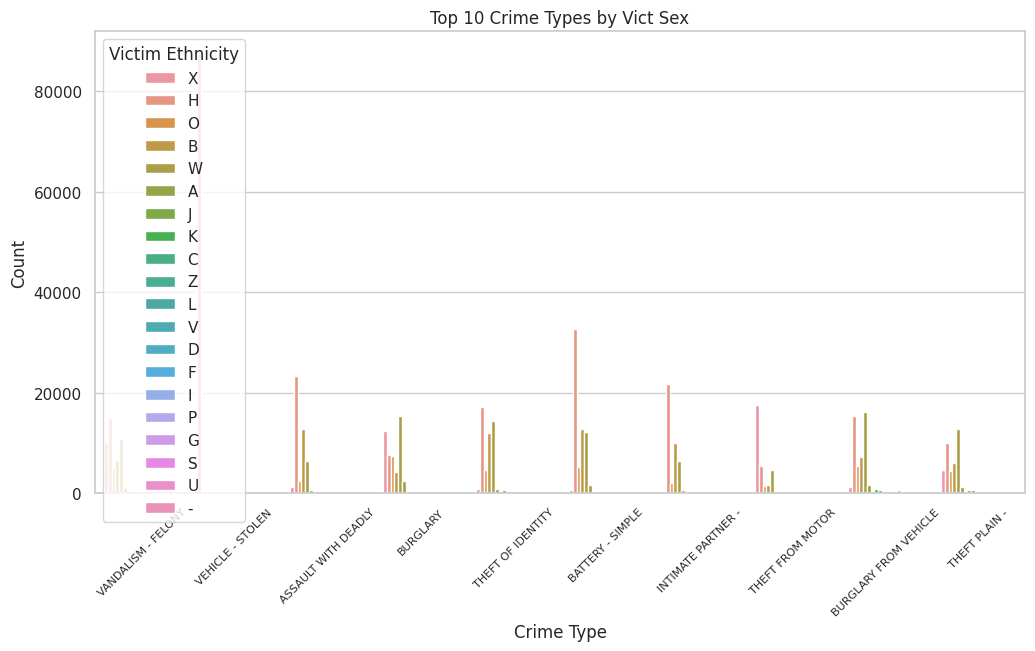

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each crime type and select the top 10
top_10_crime_types = crime['Crm Cd Desc'].value_counts().nlargest(10).index

# Filter the data for the top 10 crime types
top_10_crime_data = crime[crime['Crm Cd Desc'].isin(top_10_crime_types)]
top_10_crime_data['Crm Cd Desc Short'] = top_10_crime_data['Crm Cd Desc'].str.split().str[:3].str.join(' ')

# Create a countplot to visualize the relationship between 'Crm Cd Desc' and 'Vict Sex'
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_crime_data, x='Crm Cd Desc Short', hue='Vict Descent')
plt.title('Top 10 Crime Types by Vict Sex')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.legend(title='Victim Ethnicity', loc='upper left')
plt.show()


**5. ARIMA Model**

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
crime_tseries = pd.DataFrame(crime.groupby(crime['DATE OCC'].dt.to_period("M")).size().reset_index(name='Count'))
crime_tseries.columns = ["Date", "Crime Count"]
crime_tseries['Date'] = crime_tseries['Date'].dt.to_timestamp()
print(crime_tseries)


         Date  Crime Count
0  2020-01-01        18485
1  2020-02-01        17252
2  2020-03-01        16161
3  2020-04-01        15678
4  2020-05-01        17200
5  2020-06-01        17028
6  2020-07-01        17114
7  2020-08-01        16870
8  2020-09-01        15631
9  2020-10-01        16485
10 2020-11-01        15565
11 2020-12-01        15940
12 2021-01-01        16536
13 2021-02-01        15405
14 2021-03-01        16315
15 2021-04-01        16054
16 2021-05-01        16988
17 2021-06-01        17146
18 2021-07-01        18655
19 2021-08-01        18368
20 2021-09-01        18351
21 2021-10-01        19290
22 2021-11-01        18327
23 2021-12-01        17918
24 2022-01-01        18434
25 2022-02-01        17690
26 2022-03-01        19682
27 2022-04-01        19779
28 2022-05-01        20402
29 2022-06-01        20189
30 2022-07-01        19933
31 2022-08-01        20067
32 2022-09-01        19264
33 2022-10-01        20238
34 2022-11-01        18660
35 2022-12-01        19889
3

In [ ]:
crime_tseries.drop(45,axis=0,inplace=True)

In [ ]:
crime_tseries.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

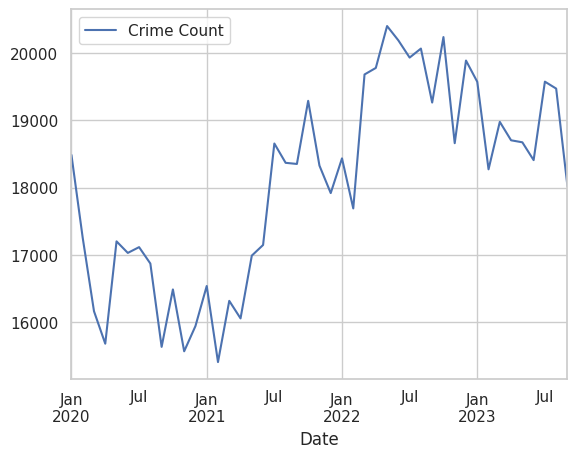

In [ ]:
crime_tseries.plot()

In [ ]:
#test if data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(crime_tseries['Crime Count'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(crime_tseries['Crime Count'])

ADF Test Statistic : -1.3484732023488404
p-value : 0.6067145689199538
#Lags Used : 1
Number of Observations Used : 43
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
crime_tseries['Crime First Difference'] = crime_tseries['Crime Count'] - crime_tseries['Crime Count'].shift(1)
crime_tseries['Crime First Difference'].head(6)

Date
2020-01-01       NaN
2020-02-01   -1233.0
2020-03-01   -1091.0
2020-04-01    -483.0
2020-05-01    1522.0
2020-06-01    -172.0
Name: Crime First Difference, dtype: float64

In [ ]:
adfuller_test(crime_tseries['Crime First Difference'].dropna())

ADF Test Statistic : -9.25452325437623
p-value : 1.4618015191606827e-15
#Lags Used : 0
Number of Observations Used : 43
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


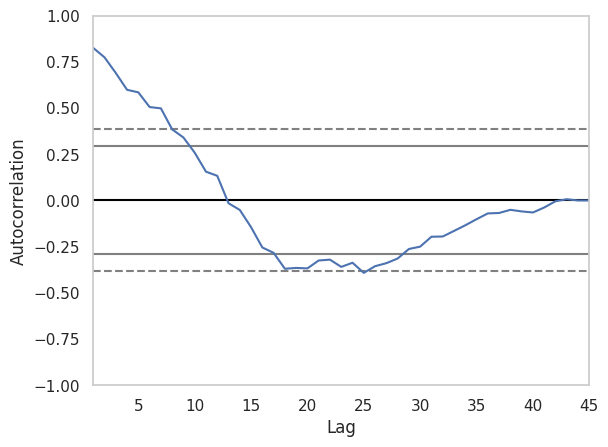

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
autocorrelation_plot(crime_tseries['Crime Count'])
plt.show()

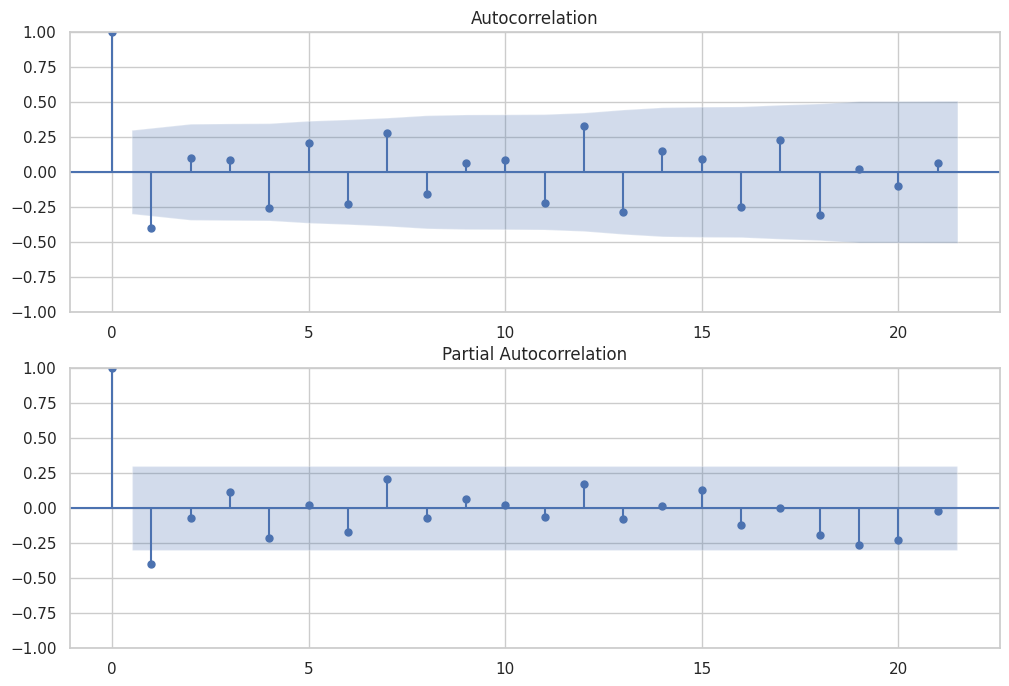

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(crime_tseries['Crime First Difference'].iloc[2:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(crime_tseries['Crime First Difference'].iloc[2:],lags=21,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(crime_tseries['Crime Count'], order=(1, 1, 1))
model_fit = model.fit()
# Display the summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                               SARIMAX Results                                
Dep. Variable:            Crime Count   No. Observations:                   45
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -355.471
Date:                Sun, 28 Jan 2024   AIC                            716.942
Time:                        23:45:16   BIC                            722.294
Sample:                    01-01-2020   HQIC                           718.927
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1622      0.335      0.485      0.628      -0.494       0.818
ma.L1         -0.4786      0.324     -1.478      0.139      -1.113       0.156
sigma2      5.828e+05   1.42e+05      4.117      0.0

In [ ]:
crime_tseries.index = pd.to_datetime(crime_tseries.index)
forecast_values = model_fit.predict(start='2023-04-01', end='2024-04-01', dynamic=True)
crime_tseries['fr'] = forecast_values
print(forecast_values)

2023-04-01    18952.419541
2023-05-01    18948.432187
2023-06-01    18947.785373
2023-07-01    18947.680449
2023-08-01    18947.663428
2023-09-01    18947.660667
2023-10-01    18947.660219
2023-11-01    18947.660147
2023-12-01    18947.660135
2024-01-01    18947.660133
2024-02-01    18947.660133
2024-03-01    18947.660133
2024-04-01    18947.660133
Freq: MS, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

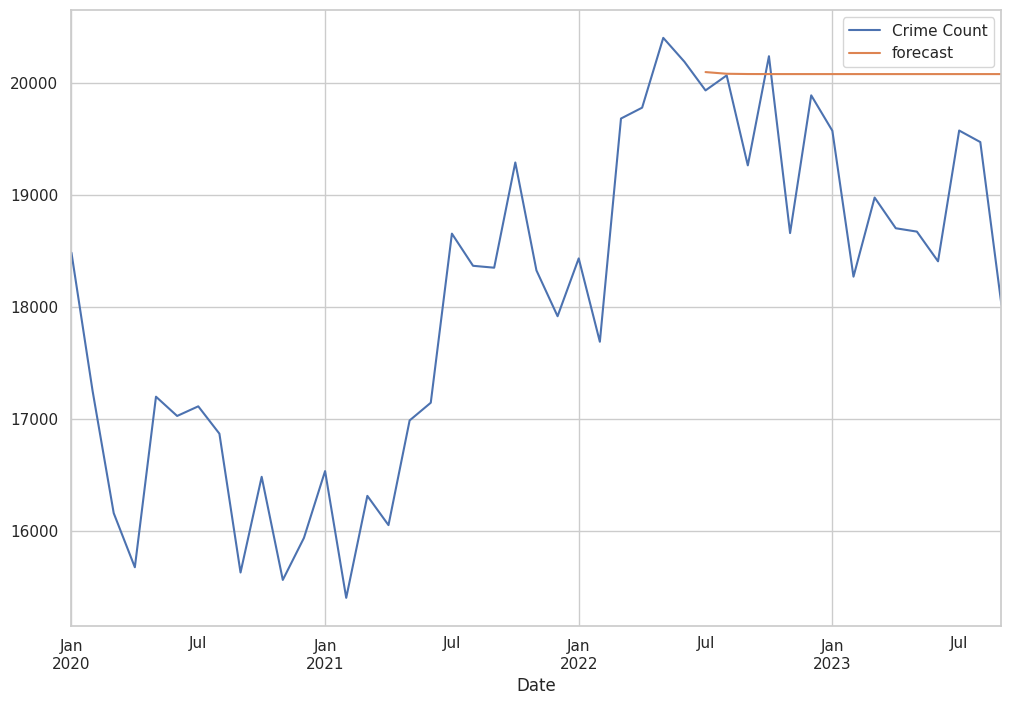

In [ ]:
crime_tseries['forecast'] = model_fit.predict(start=30, end=103, dynamic=True)
crime_tseries[['Crime Count','forecast']].plot(figsize=(12,8))

In [ ]:
forecast

2022-07-01    20059.486632
2022-08-01    20111.560212
2022-09-01    20067.124487
2022-10-01    20101.287548
2022-11-01    20074.739573
                  ...     
2028-04-01    20086.340422
2028-05-01    20086.340420
2028-06-01    20086.340422
2028-07-01    20086.340421
2028-08-01    20086.340421
Freq: MS, Name: predicted_mean, Length: 74, dtype: float64

In [ ]:
forecast_df = pd.DataFrame(forecast_values, index=pd.date_range(start='2023-04-01', end='2024-04-01', freq='M'), columns=['forecast'])
crime_tseries = pd.concat([crime_tseries, forecast_df])

# Print the updated DataFrame
print(crime_tseries)

            Crime Count  Crime First Difference  forecast
2020-01-01      18485.0                     NaN       NaN
2020-02-01      17252.0                 -1233.0       NaN
2020-03-01      16161.0                 -1091.0       NaN
2020-04-01      15678.0                  -483.0       NaN
2020-05-01      17200.0                  1522.0       NaN
...                 ...                     ...       ...
2024-03-28          NaN                     NaN       NaN
2024-03-29          NaN                     NaN       NaN
2024-03-30          NaN                     NaN       NaN
2024-03-31          NaN                     NaN       NaN
2024-04-01          NaN                     NaN       NaN

[412 rows x 3 columns]


In [ ]:
crime_tseries.tail()

,Crime Count,Crime First Difference,forecast
Date,,,
2023-05-01,18673,-30.0,18926.346765
2023-06-01,18408,-265.0,18925.364265
2023-07-01,19575,1167.0,18925.853006
2023-08-01,19472,-103.0,18925.450925
2023-09-01,18020,-1452.0,18925.761180


In [ ]:
# # Plotting the historical data and forecast with explicit x-axis limits
# plt.figure(figsize=(12, 8))
# plt.plot(crime_tseries['forecast'], label='Forecast', color='red')
# plt.plot(crime_tseries['Crime Count'], label='Historical Data')
# plt.title('Crime Count Forecast (Oct 2023 - Apr 2024)')
# plt.legend()

# # Set x-axis limits
# plt.xlim(left=min(crime_tseries.index), right=max(crime_tseries['forecast']))
# plt.show()

In [ ]:
crime_tseries['Crime Seasonal Diff'] = crime_tseries['Crime Count'] - crime_tseries['Crime Count'].shift(12)
crime_tseries['Crime Seasonal Diff']

Date
2020-01-01       NaN
2020-02-01       NaN
2020-03-01       NaN
2020-04-01       NaN
2020-05-01       NaN
2020-06-01       NaN
2020-07-01       NaN
2020-08-01       NaN
2020-09-01       NaN
2020-10-01       NaN
2020-11-01       NaN
2020-12-01       NaN
2021-01-01   -1949.0
2021-02-01   -1847.0
2021-03-01     154.0
2021-04-01     376.0
2021-05-01    -212.0
2021-06-01     118.0
2021-07-01    1541.0
2021-08-01    1498.0
2021-09-01    2720.0
2021-10-01    2805.0
2021-11-01    2762.0
2021-12-01    1978.0
2022-01-01    1898.0
2022-02-01    2285.0
2022-03-01    3367.0
2022-04-01    3725.0
2022-05-01    3414.0
2022-06-01    3043.0
2022-07-01    1278.0
2022-08-01    1699.0
2022-09-01     913.0
2022-10-01     948.0
2022-11-01     333.0
2022-12-01    1971.0
2023-01-01    1139.0
2023-02-01     581.0
2023-03-01    -705.0
2023-04-01   -1076.0
2023-05-01   -1729.0
2023-06-01   -1781.0
2023-07-01    -358.0
2023-08-01    -595.0
2023-09-01   -1244.0
Name: Crime Seasonal Diff, dtype: float64

In [ ]:
## Again test dickey fuller test
adfuller_test(crime_tseries['Crime Seasonal Diff'].dropna())

ADF Test Statistic : -0.707599345989247
p-value : 0.8447713040564553
#Lags Used : 9
Number of Observations Used : 23
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
crime_tseries['Seasonal Second Diff'] = crime_tseries['Crime Seasonal Diff'] - crime_tseries['Crime Seasonal Diff'].shift(1)

In [ ]:
## Again test dickey fuller test
adfuller_test(crime_tseries['Seasonal Second Diff'].dropna())

ADF Test Statistic : -1.740295076265624
p-value : 0.4104798732408982
#Lags Used : 10
Number of Observations Used : 21
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
crime_tseries['Seasonal Third Diff'] = crime_tseries['Seasonal Second Diff'] - crime_tseries['Seasonal Second Diff'].shift(1)
adfuller_test(crime_tseries['Seasonal Third Diff'].dropna())

ADF Test Statistic : -3.0077999321528948
p-value : 0.034172377427397795
#Lags Used : 9
Number of Observations Used : 21
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


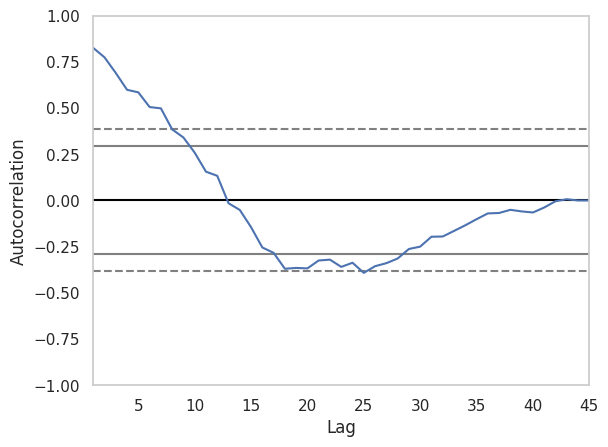

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
autocorrelation_plot(crime_tseries['Crime Count'])
plt.show()

<Axes: xlabel='Date'>

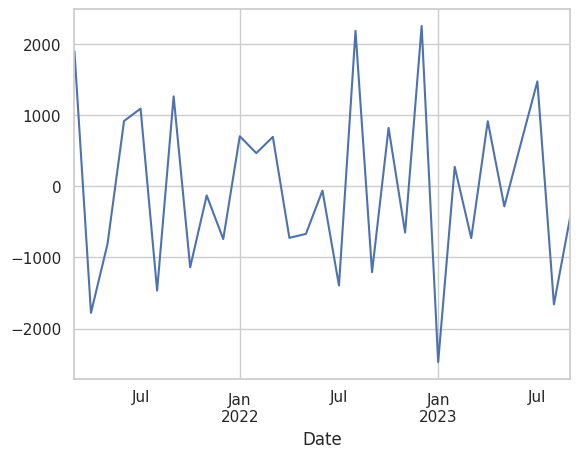

In [ ]:
crime_tseries['Seasonal Third Diff'].dropna().plot()

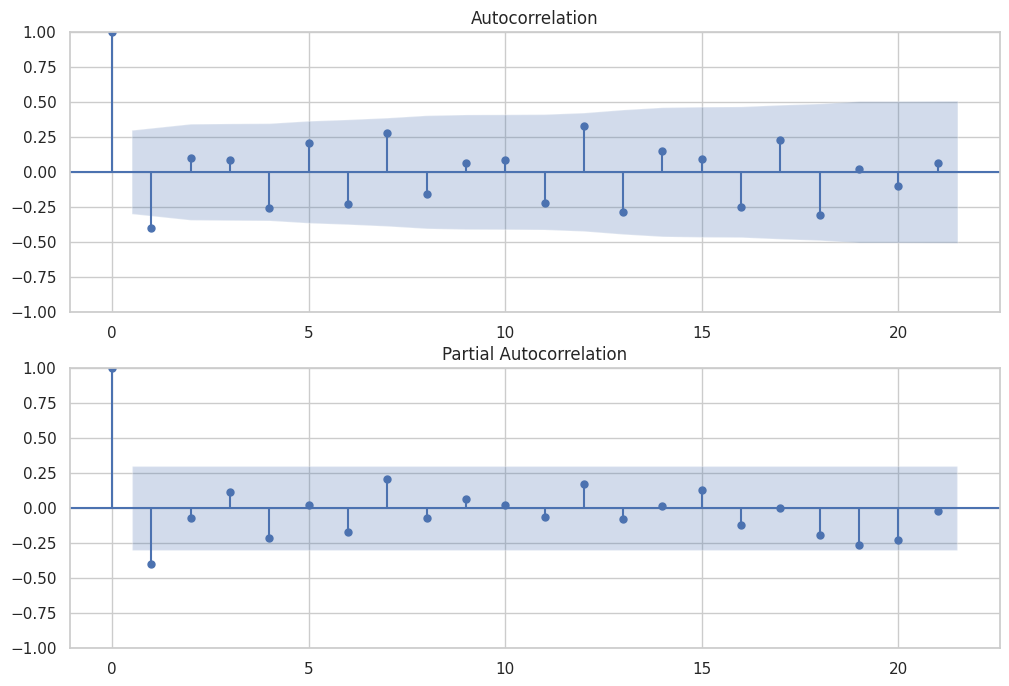

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(crime_tseries['Crime First Difference'].iloc[2:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(crime_tseries['Crime First Difference'].iloc[2:],lags=21,ax=ax2)

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(crime_tseries['Crime Count'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
res=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<Axes: xlabel='Date'>

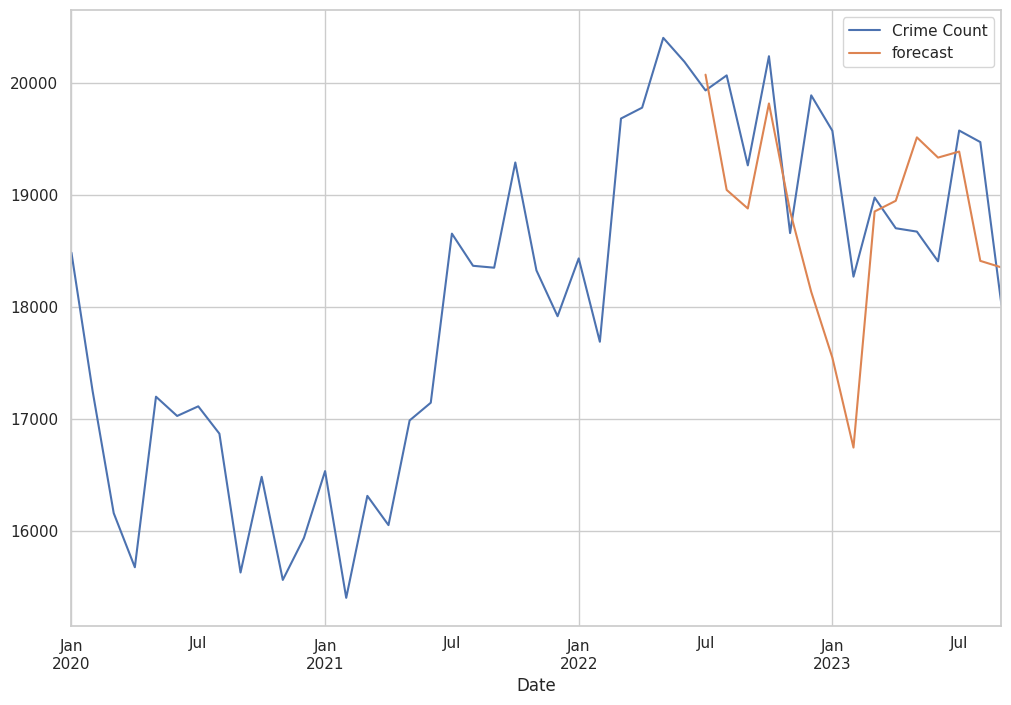

In [ ]:
crime_tseries['forecast']=res.predict(start=30,end=105,dynamic=True)
crime_tseries[['Crime Count','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[crime_tseries.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=crime_tseries.columns)

In [ ]:
future_datest_df

,Crime Count,Crime First Difference,fr,forecast,Crime Seasonal Diff,Seasonal Second Diff,Seasonal Third Diff
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

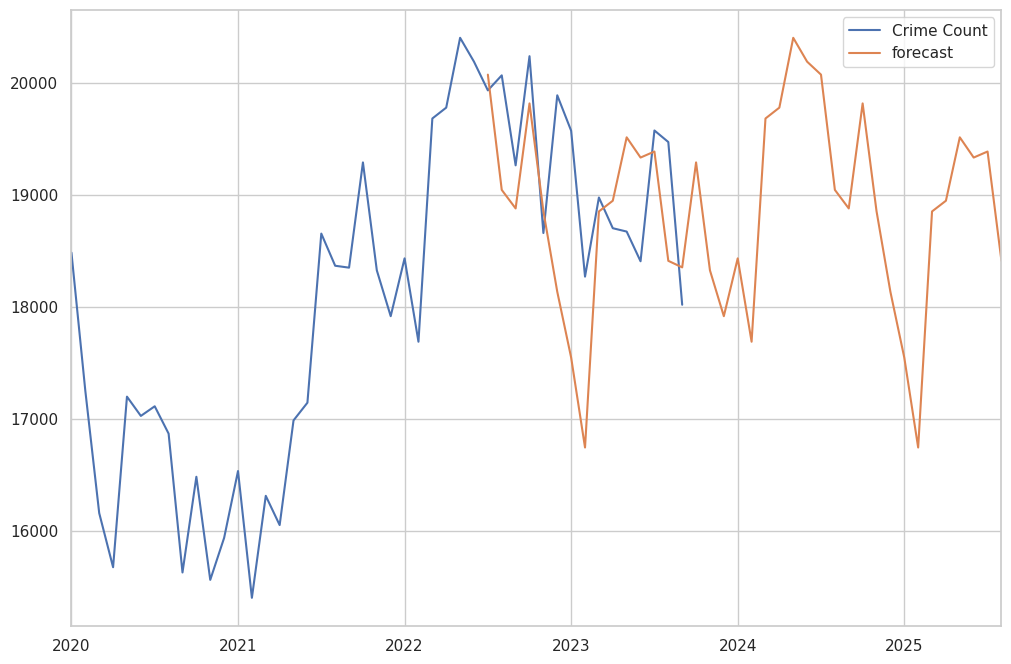

In [ ]:
future_df=pd.concat([crime_tseries,future_datest_df])
future_df['forecast'] = res.predict(start = 30, end = 120, dynamic= True)
future_df[['Crime Count', 'forecast']].plot(figsize=(12, 8))

As there's no particular seasonal trend observed in the data,

**ARIMA DATA-2**

In [ ]:
crime_trend= pd.read_csv('/content/drive/MyDrive/content/Crime_Data_from_2010_to_2019.csv', delimiter=",")


In [ ]:
# Convert the date and time columns to date-time datatype
crime_trend['Date Rptd'] = pd.to_datetime(crime_trend['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
crime_trend['DATE OCC'] = pd.to_datetime(crime_trend['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#as the time column doesn't have uniform values throughout the dataset, the 0s are added and separated by colon
crime_trend['TIME OCC'] = crime_trend['TIME OCC'].astype(str).str.zfill(4)
crime_trend['TIME OCC'] = crime_trend['TIME OCC'].apply(lambda x: re.sub(r'[^0-9]', ':', x))
crime_trend['TIME OCC'] = crime_trend['TIME OCC'].apply(lambda x: f'{x[:2]}:{x[2:]}')

#converting to time
crime_trend['TIME OCC'] = pd.to_datetime(crime_trend['TIME OCC'], format='%H:%M').dt.time


In [ ]:
crime_trend.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20,13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12,00:45:00,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09,15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,2010-01-05,2010-01-05,01:50:00,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,2010-01-03,2010-01-02,21:00:00,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [ ]:
cr_forecast = pd.DataFrame(crime_trend.groupby(crime_trend['DATE OCC'].dt.to_period("M")).size().reset_index(name='Count'))
cr_forecast.columns = ["Date", "Crime Count"]
cr_forecast['Date'] = cr_forecast['Date'].dt.to_timestamp()
print(cr_forecast)


          Date  Crime Count
0   2010-01-01         6030
1   2010-02-01         5301
2   2010-03-01         6032
3   2010-04-01         5921
4   2010-05-01         5924
..         ...          ...
151 2023-08-01        14769
152 2023-09-01        14100
153 2023-10-01        15104
154 2023-11-01        14358
155 2023-12-01        14226

[156 rows x 2 columns]


In [ ]:
cr_forecast.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

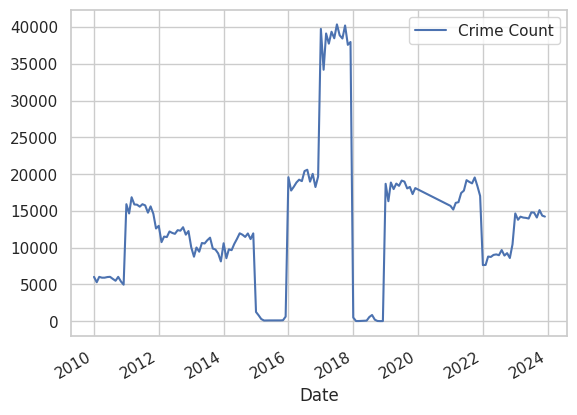

In [ ]:
cr_forecast.plot()

In [ ]:
res=adfuller(cr_forecast['Crime Count'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(cr_forecast['Crime Count'])

ADF Test Statistic : -2.650815951543293
p-value : 0.08294273115175804
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
cr_forecast['Crime First Difference'] = cr_forecast['Crime Count'] - cr_forecast['Crime Count'].shift(1)
cr_forecast['Crime First Difference']

Date
2010-01-01       NaN
2010-02-01    -729.0
2010-03-01     731.0
2010-04-01    -111.0
2010-05-01       3.0
               ...  
2023-08-01     -30.0
2023-09-01    -669.0
2023-10-01    1004.0
2023-11-01    -746.0
2023-12-01    -132.0
Name: Crime First Difference, Length: 156, dtype: float64

In [ ]:
cr_forecast['Crime Seasonal Diff']=cr_forecast['Crime Count'] - cr_forecast['Crime Count'].shift(15)
cr_forecast.head(14)

,Crime Count,Crime First Difference,Crime Seasonal Diff
Date,,,
2010-01-01,6030,NaN,NaN
2010-02-01,5301,-729.0,NaN
2010-03-01,6032,731.0,NaN
2010-04-01,5921,-111.0,NaN
2010-05-01,5924,3.0,NaN
2010-06-01,6007,83.0,NaN
2010-07-01,6037,30.0,NaN
2010-08-01,5759,-278.0,NaN
2010-09-01,5504,-255.0,NaN


In [ ]:
adfuller_test(cr_forecast['Crime Seasonal Diff'].dropna())

ADF Test Statistic : -3.5065616769029933
p-value : 0.007820166776139541
#Lags Used : 14
Number of Observations Used : 126
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

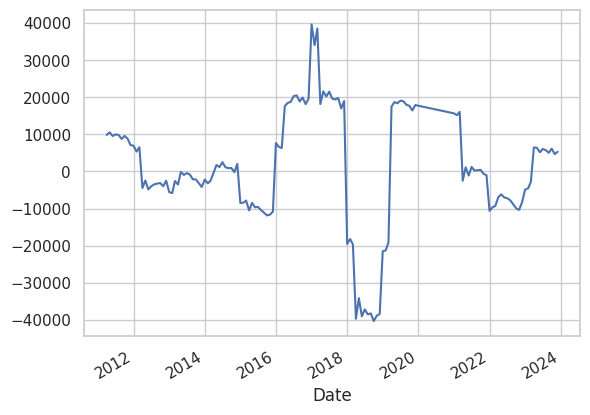

In [ ]:
cr_forecast['Crime Seasonal Diff'].plot()

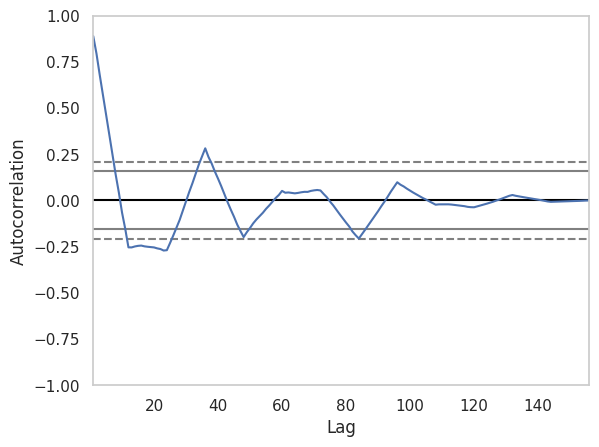

In [ ]:
autocorrelation_plot(cr_forecast['Crime Count'])
plt.show()

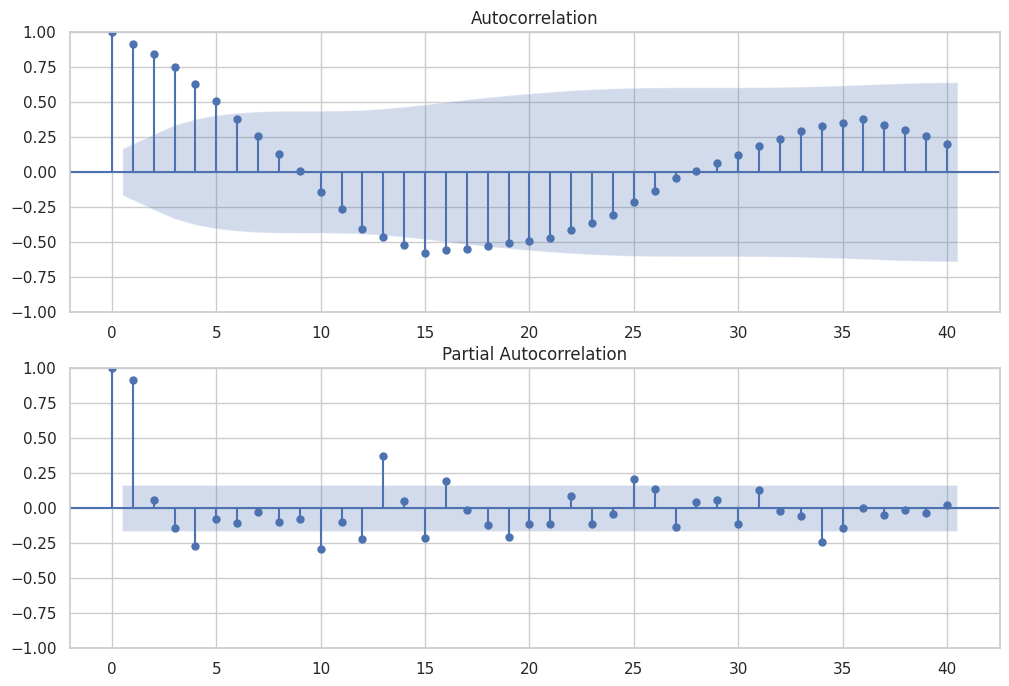

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cr_forecast['Crime Seasonal Diff'].iloc[16:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cr_forecast['Crime Seasonal Diff'].iloc[16:],lags=40,ax=ax2)

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(cr_forecast['Crime Count'],order=(0, 1, 0),seasonal_order=(1,1,1,15))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<Axes: xlabel='Date'>

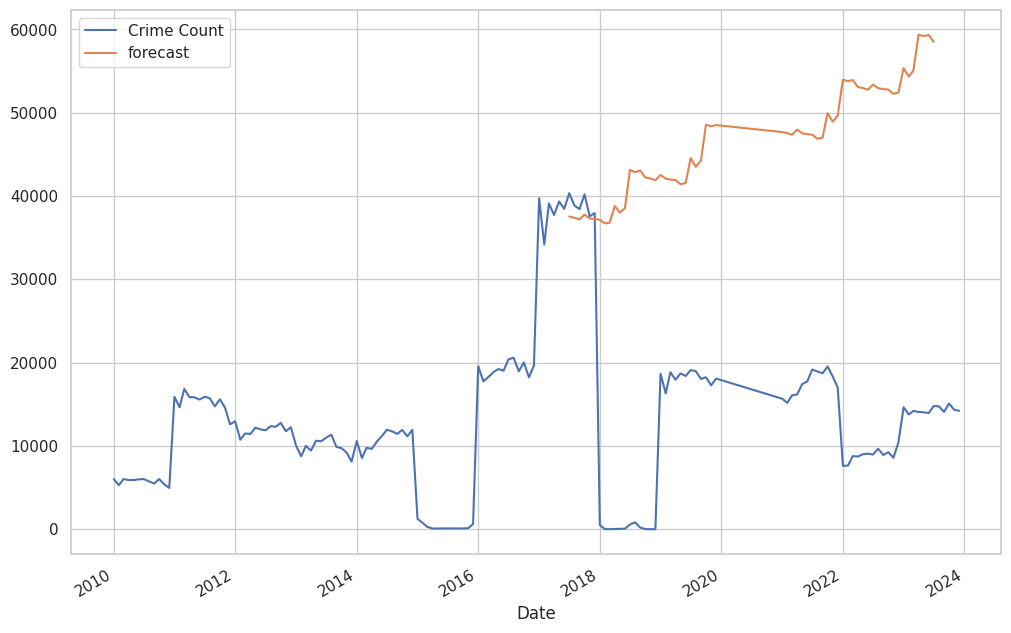

In [ ]:
cr_forecast['forecast']=results.predict(start=90,end=150,dynamic=True)
cr_forecast[['Crime Count','forecast']].plot(figsize=(12,8))

In [ ]:

from pandas.tseries.offsets import DateOffset
future_dates=[cr_forecast.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=cr_forecast.columns)
future_datest_df.tail()

,Crime Count,Crime First Difference,Crime Seasonal Diff,forecast
2025-07-01,NaN,NaN,NaN,NaN
2025-08-01,NaN,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN,NaN


<Axes: >

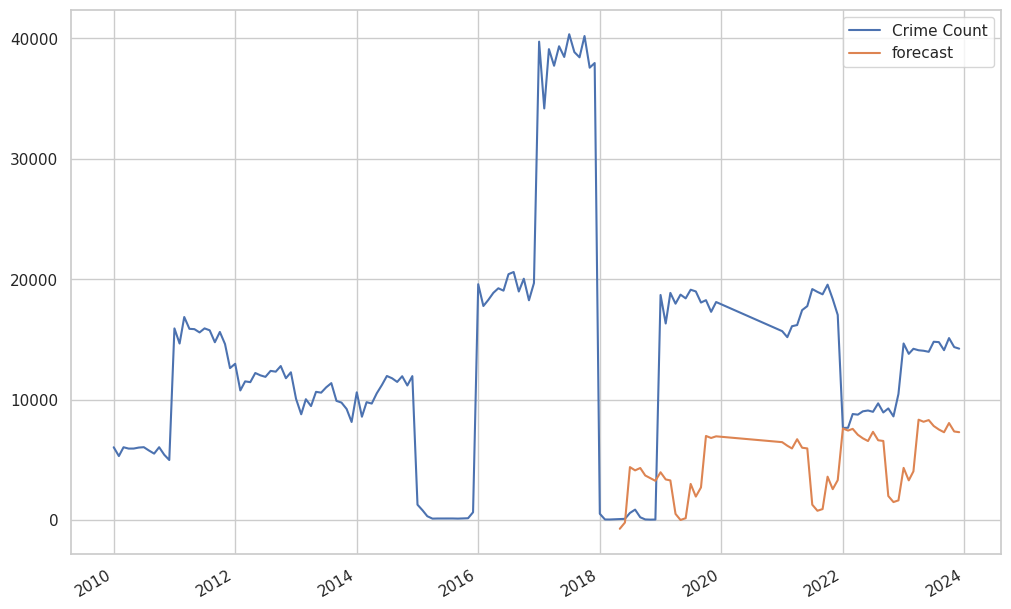

In [ ]:
future_df=pd.concat([cr_forecast,future_datest_df])
future_df['forecast'] = results.predict(start = 100, end = 155, dynamic= True)
future_df[['Crime Count', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df['forecast'].tail(14)

2024-10-01   NaN
2024-11-01   NaN
2024-12-01   NaN
2025-01-01   NaN
2025-02-01   NaN
2025-03-01   NaN
2025-04-01   NaN
2025-05-01   NaN
2025-06-01   NaN
2025-07-01   NaN
2025-08-01   NaN
2025-09-01   NaN
2025-10-01   NaN
2025-11-01   NaN
Name: forecast, dtype: float64

In [ ]:
#ARIMA
model2 = ARIMA(cr_forecast['Crime Count'], order=(5, 1, 2))
model2_fit = model2.fit()
# Display the summary
print(model2_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:            Crime Count   No. Observations:                  156
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1516.047
Date:                Tue, 16 Jan 2024   AIC                           3048.094
Time:                        00:41:09   BIC                           3072.441
Sample:                             0   HQIC                          3057.983
                                - 156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0562      0.212     -0.265      0.791      -0.472       0.359
ar.L2          0.9649      0.128      7.527      0.000       0.714       1.216
ar.L3          0.0391      0.394      0.099      0.9

In [ ]:
cr_forecast.index = pd.to_datetime(cr_forecast.index)
f_val = model2_fit.predict(start='2022-04-01', end='2023-12-01', dynamic=True)
forecast_df = pd.DataFrame(index=cr_forecast.index)
cr_forecast['forecast'] = f_val
print(cr_forecast)




            Crime Count      forecast
Date                                 
2010-01-01         6030           NaN
2010-02-01         5301           NaN
2010-03-01         6032           NaN
2010-04-01         5921           NaN
2010-05-01         5924           NaN
...                 ...           ...
2023-08-01        14769  12221.182500
2023-09-01        14100  12289.132081
2023-10-01        15104  12308.144831
2023-11-01        14358  12358.071927
2023-12-01        14226  12373.202056

[156 rows x 2 columns]


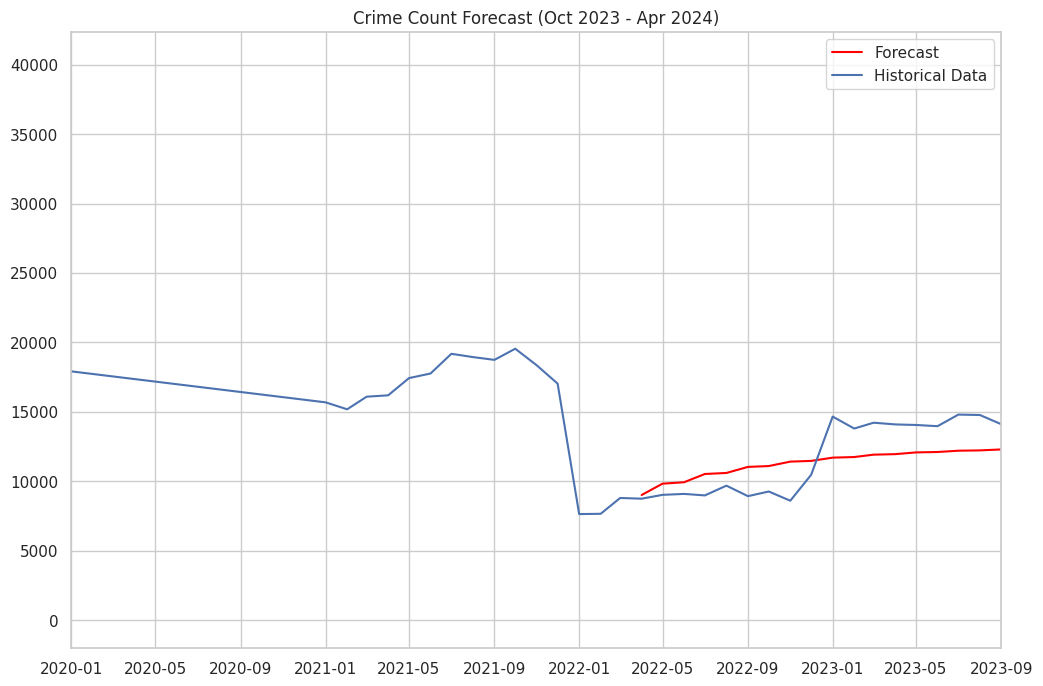

In [ ]:
# Plotting the historical data and forecast with explicit x-axis limits
plt.figure(figsize=(12, 8))
plt.plot(cr_forecast['forecast'], label='Forecast', color='red')
plt.plot(cr_forecast['Crime Count'], label='Historical Data')
plt.title('Crime Count Forecast (Oct 2023 - Apr 2024)')
plt.legend()

# Set x-axis limits
plt.xlim(left=min(crime_tseries.index), right=max(crime_tseries.index))

plt.show()

<ipython-input-371-499066e53f71>:18: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.



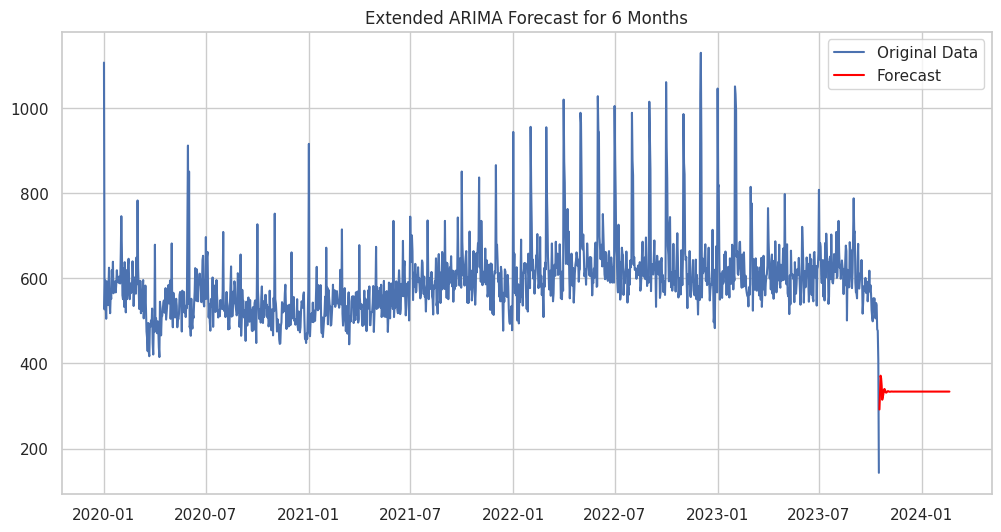

In [ ]:
crime.set_index('DATE OCC', inplace = True)
resampled_data = crime['DR_NO'].resample('M').count().fillna(0)


model = ARIMA(resampled_data, order=(5,1,0))
model_fit = model.fit()


forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)


# Calculate the number of business days in 6 months (approximately 21 business days per month)
forecast_months = 6
forecast_steps = forecast_months * 21

# Generate the date range for the extended forecast
date_range = pd.date_range(start=resampled_data.index[-1], periods=forecast_steps + 1, closed='right')

# Perform the extended forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the extended forecast
plt.figure(figsize=(12, 6))
plt.plot(resampled_data, label='Original Data')
plt.plot(date_range, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Extended ARIMA Forecast for 6 Months')
plt.show()